<a href="https://colab.research.google.com/github/Jlokkerbol/masterclass/blob/main/DSBM_Crime_Prediction_Data_extraction_and_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting and preparing predictor data from Statistics Netherlands

This notebook shows you how to extract and prepare predictor data from Statistics Netherlands, which could be used to predict crime rates.

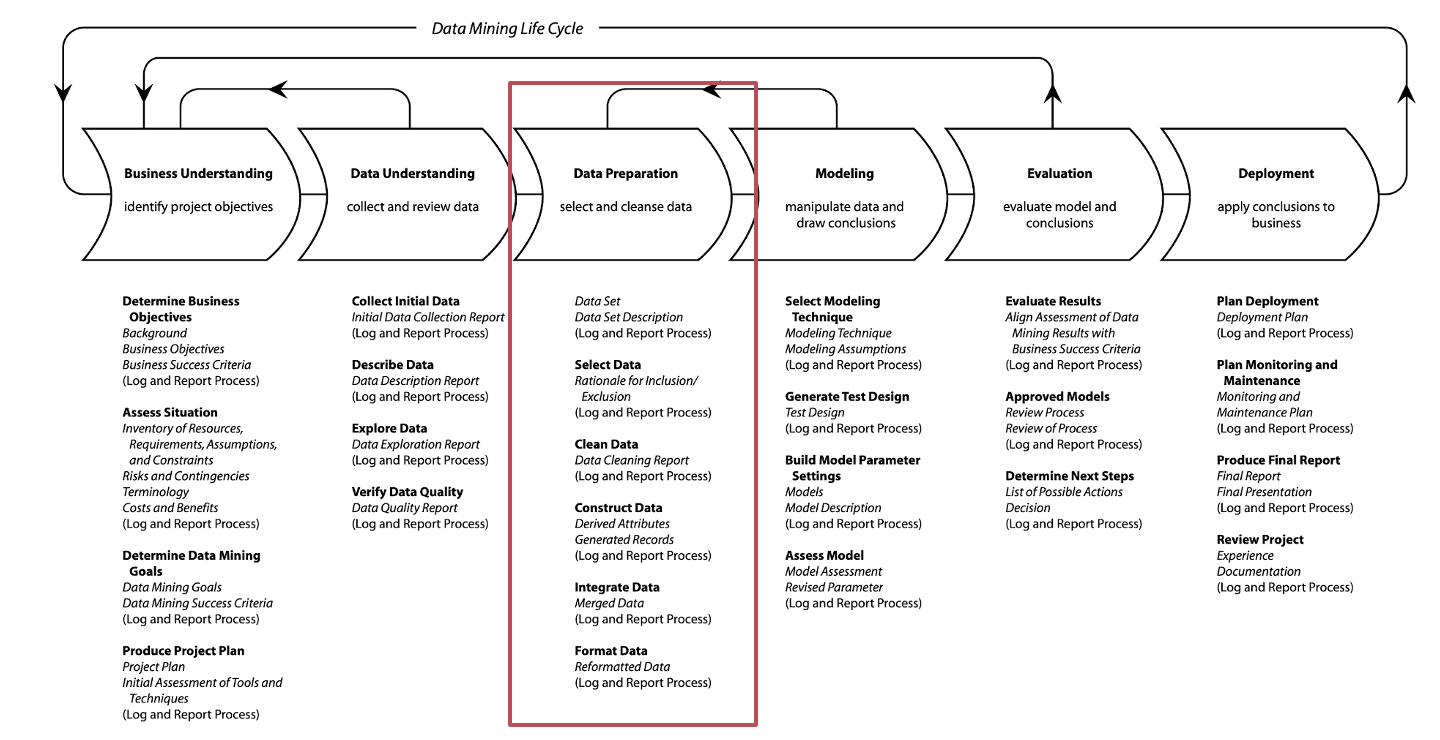

In [1]:
# install the module that connects with the Statistics Netherlands API
# https://www.cbs.nl/nl-nl/onze-diensten/open-data/hulpmiddel-voor-het-gebruik-van-odata-in-r-en-python
!pip install cbsodata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import / activate the relevant modules
import pandas as pd
import cbsodata

In [3]:
# download table of contents with the available tables at CBS and show first 10 entries
toc = pd.DataFrame(cbsodata.get_table_list())
toc.head()

,Updated,ID,Identifier,Title,ShortTitle,ShortDescription,Summary,Modified,MetaDataModified,ReasonDelivery,...,Period,SummaryAndLinks,ApiUrl,FeedUrl,DefaultPresentation,DefaultSelection,GraphTypes,RecordCount,ColumnCount,SearchPriority
0,2021-11-01T02:00:00,0,84669NED,Banen van werknemers; internationaliseringsken...,Banen; internationalisering bedrijven,\nDeze tabel bevat informatie over werknemersb...,"werknemersbanen, voltijdequivalenten, arbeidsv...",2020-12-14T02:00:00,2021-11-01T02:00:00,Stopgezet,...,2010 t/m 2018,"werknemersbanen, voltijdequivalenten, arbeidsv...",https://opendata.cbs.nl/ODataApi/OData/84669NED,https://opendata.cbs.nl/ODataFeed/OData/84669NED,ts=1606984891185&graphtype=Table&r=Internation...,$filter=((BedrijfstakkenBranchesSBI2008 eq 'T0...,"Table,Bar,Line",304128,10,1
1,2021-11-05T02:00:00,1,83583NED,Banen van werknemers; bedrijfsgrootte en econo...,Banen van werknemers; bedrijfsgrootte,\nDeze tabel geeft informatie over het gemidde...,Gemiddeld aantal banen van werknemers in decem...,2021-11-05T02:00:00,2021-11-05T02:00:00,Actualisering,...,2010 december - 2020 december,Gemiddeld aantal banen van werknemers in decem...,https://opendata.cbs.nl/ODataApi/OData/83583NED,https://opendata.cbs.nl/ODataFeed/OData/83583NED,"ts=1635771190489&graphtype=Table&r=Perioden,Be...",$filter=((BedrijfstakkenBranchesSBI2008 eq 'T0...,"Table,Bar,Line",8184,4,2
2,2021-11-05T02:00:00,2,83582NED,Banen van werknemers in december; economische ...,"Banen van werknemers; SBI2008, regio",\nDeze tabel geeft informatie over het gemidde...,"Gemiddeld aantal banen werknemers in december,...",2021-11-05T02:00:00,2021-11-05T02:00:00,Actualisering,...,2010-2020,"Gemiddeld aantal banen werknemers in december,...",https://opendata.cbs.nl/ODataApi/OData/83582NED,https://opendata.cbs.nl/ODataFeed/OData/83582NED,ts=1635768991535&graphtype=Table&r=Bedrijfstak...,$filter=((BedrijfstakkenBranchesSBI2008 eq 'T0...,"Table,Map",172480,4,3
3,2022-01-21T02:00:00,3,83628NED,Banen van werknemers naar woon- en werkregio,Woon-werkafstand werknemers; regio,\nDeze tabel brengt het aantal banen van werkn...,"Banen van werknemers, woonregio, werkregio\nBa...",2022-01-21T02:00:00,2022-01-21T02:00:00,Actualisering,...,2014-2020,"Banen van werknemers, woonregio, werkregio<br ...",https://opendata.cbs.nl/ODataApi/OData/83628NED,https://opendata.cbs.nl/ODataFeed/OData/83628NED,"ts=1642524267970&graphtype=Table&r=WoonregioS,...",$filter=((WoonregioS eq 'NL01 ') or (Woonregi...,"Table,Bar,Map",1586032,5,2
4,2022-01-21T02:00:00,4,83658NED,"Banen van werknemers; geslacht, leeftijd, woon...","Woon-werkafstand; geslacht, leeftijd",\nDeze tabel brengt het aantal banen van werkn...,"Banen van werknemers naar geslacht, leeftijd, ...",2022-01-21T02:00:00,2022-01-21T02:00:00,Actualisering,...,2014-2020,"Banen van werknemers naar geslacht, leeftijd, ...",https://opendata.cbs.nl/ODataApi/OData/83658NED,https://opendata.cbs.nl/ODataFeed/OData/83658NED,"ts=1642510021931&graphtype=Table&r=WoonregioS,...",$filter=((Geslacht eq 'T001038')) and ((Leefti...,"Table,Bar,Map",1270500,7,2


In [4]:
# extract only those rows for which the title contains 'kerncijfers wijken'
selection = toc['Title'].str.contains('Kerncijfers wijken')
toc.loc[selection, ['Identifier', 'ShortTitle']]

,Identifier,ShortTitle
968,85039NED,Kerncijfers wijken en buurten 2021
969,84799NED,Kerncijfers wijken en buurten 2020
970,84583NED,Kerncijfers wijken en buurten 2019
971,84286NED,Kerncijfers wijken en buurten 2018
972,83765NED,Kerncijfers wijken en buurten 2017
973,83487NED,Kerncijfers wijken en buurten 2016
3391,83220NED,Kerncijfers wijken en buurten 2015
3392,82931NED,Kerncijfers wijken en buurten 2014
3393,82339NED,Kerncijfers wijken en buurten 2013
3394,70904ned,Kerncijfers wijken en buurten 2009-2012


In [5]:
%%time
### loading the municipality tables; this could take 20-30 minutes
df_indicators_municipalities_2004_08 = pd.DataFrame(cbsodata.get_data('81903NED'))
df_indicators_municipalities_2009_12 = pd.DataFrame(cbsodata.get_data("70904ned"))
df_indicators_municipalities_2013 = pd.DataFrame(cbsodata.get_data("82339NED"))
df_indicators_municipalities_2014 = pd.DataFrame(cbsodata.get_data("82931NED"))
df_indicators_municipalities_2015 = pd.DataFrame(cbsodata.get_data("83220NED"))
df_indicators_municipalities_2016 = pd.DataFrame(cbsodata.get_data("83487NED"))
df_indicators_municipalities_2017 = pd.DataFrame(cbsodata.get_data("83765NED"))
df_indicators_municipalities_2018 = pd.DataFrame(cbsodata.get_data("84286NED"))
df_indicators_municipalities_2019 = pd.DataFrame(cbsodata.get_data("84583NED"))
df_indicators_municipalities_2020 = pd.DataFrame(cbsodata.get_data("84799NED"))

CPU times: user 39.1 s, sys: 4.76 s, total: 43.9 s
Wall time: 26min 48s


We now have a LOT of data that we need to clean and explore. In a first step we will select only the Region-level we are interested in, which is the municipality level (gemeente level). Let's start with looking at one of the tables.

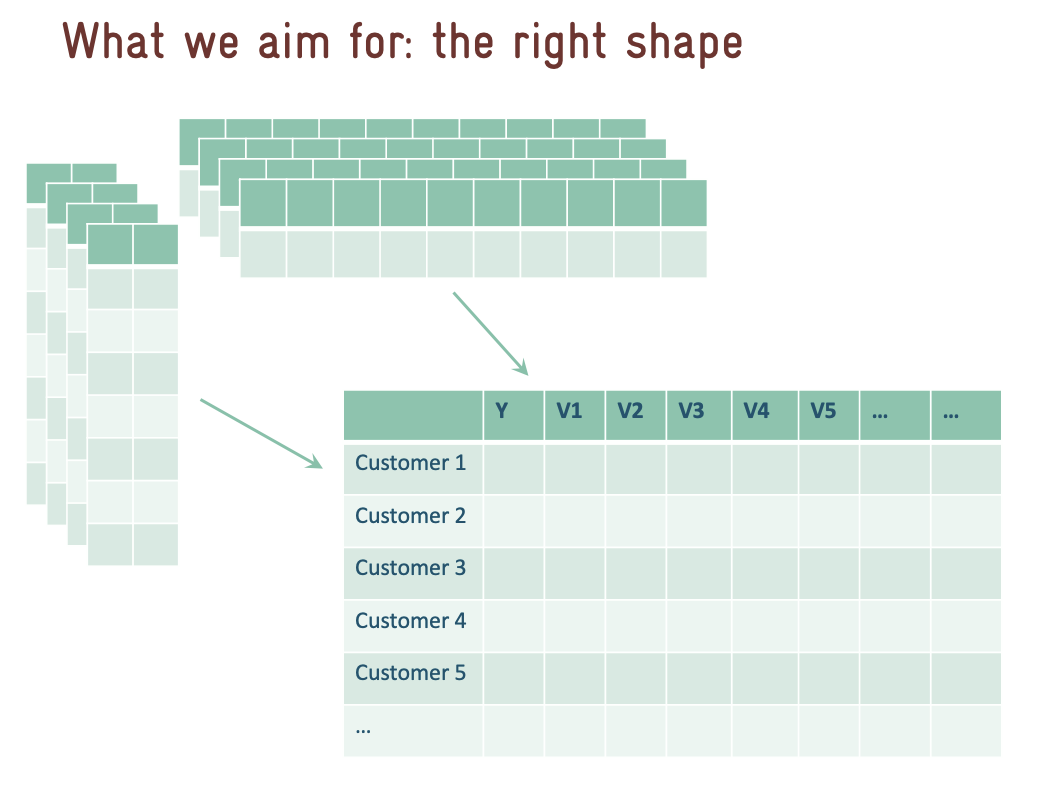

## Goals

- Achieve the right shape of data
- Close the gap between the desired and actual dataset (through feature engineering and/or extracting additional data)
- Splitting the data in a way that reflects reality



- Get a feel for how much work this is
- Get a feel for how much involvement this requires on the part of the domain expert

In [6]:
pd.options.display.max_columns = 200
df_indicators_municipalities_2013.head()

,ID,RegioS,Gemeentenaam_1,SoortRegio_2,Codering_3,AantalInwoners_4,Mannen_5,Vrouwen_6,k_0Tot15Jaar_7,k_15Tot25Jaar_8,k_25Tot45Jaar_9,k_45Tot65Jaar_10,k_65JaarOfOuder_11,Ongehuwd_12,Gehuwd_13,Gescheiden_14,Verweduwd_15,WestersTotaal_16,NietWestersTotaal_17,Marokko_18,NederlandseAntillenEnAruba_19,Suriname_20,Turkije_21,OverigNietWesters_22,GeboorteTotaal_23,GeboorteRelatief_24,SterfteTotaal_25,SterfteRelatief_26,HuishoudensTotaal_27,Eenpersoonshuishoudens_28,HuishoudensZonderKinderen_29,HuishoudensMetKinderen_30,GemiddeldeHuishoudensgrootte_31,Bevolkingsdichtheid_32,Woningvoorraad_33,GemiddeldeWoningwaarde_34,PercentageEengezinswoning_35,PercentageMeergezinswoning_36,PercentageBewoond_37,PercentageLeegstaand_38,Koopwoningen_39,HuurwoningenTotaal_40,InBezitWoningcorporatie_41,InBezitOverigeVerhuurders_42,EigendomOnbekend_43,BouwjaarVoor2000_44,BouwjaarVanaf2000_45,GemiddeldElektriciteitsverbruikTotaal_46,Appartement_47,Tussenwoning_48,Hoekwoning_49,TweeOnderEenKapWoning_50,VrijstaandeWoning_51,Huurwoning_52,Koopwoning_53,GemiddeldAardgasverbruikTotaal_54,Appartement_55,Tussenwoning_56,Hoekwoning_57,TweeOnderEenKapWoning_58,VrijstaandeWoning_59,Huurwoning_60,Koopwoning_61,PercentageWoningenMetStadsverwarming_62,AantalInkomensontvangers_63,GemiddeldInkomenPerInkomensontvanger_64,GemiddeldInkomenPerInwoner_65,PersonenMetLaagInkomen_66,PersonenMetHoogInkomen_67,NietActieven_68,HuishoudensMetLaagInkomen_69,HuishoudensMetHoogInkomen_70,HuishoudensMetLageKoopkracht_71,HuishOnderOfRondSociaalMinimum_72,PersonenMetEenWWBUitkeringTotaal_73,PersonenMetEenAOUitkeringTotaal_74,PersonenMetEenWWUitkeringTotaal_75,PersonenMetEenAOWUitkeringTotaal_76,BedrijfsvestigingenTotaal_77,ALandbouwBosbouwEnVisserij_78,BFNijverheidEnEnergie_79,GIHandelEnHoreca_80,HJVervoerInformatieEnCommunicatie_81,KLFinancieleDienstenOnroerendGoed_82,MNZakelijkeDienstverlening_83,RUCultuurRecreatieOverigeDiensten_84,PersonenautoSTotaal_85,PersonenautoSJongerDan6Jaar_86,PersonenautoS6JaarEnOuder_87,PersonenautoSBrandstofBenzine_88,PersonenautoSOverigeBrandstof_89,PersonenautoSPerHuishouden_90,PersonenautoSNaarOppervlakte_91,Bedrijfsmotorvoertuigen_92,Motortweewielers_93,AfstandTotHuisartsenpraktijk_94,AfstandTotGroteSupermarkt_95,AfstandTotKinderdagverblijf_96,AfstandTotSchool_97,ScholenBinnen3Km_98,OppervlakteTotaal_99,OppervlakteLand_100,OppervlakteWater_101,StedelijkBodemgebruikTotaal_102,Verkeersterrein_103,BebouwdTerrein_104,SemiBebouwdTerrein_105,Recreatieterrein_106,StedelijkBodemgebruikTotaal_107,Verkeersterrein_108,BebouwdTerrein_109,SemiBebouwdTerrein_110,Recreatieterrein_111,NietStedelijkBodemgebruikTotaal_112,AgrarischTerrein_113,BosEnOpenNatuurlijkTerrein_114,NietStedelijkBodemgebruikTotaal_115,AgrarischTerrein_116,BosEnOpenNatuurlijkTerrein_117,MeestVoorkomendePostcode_118,Dekkingspercentage_119,MateVanStedelijkheid_120,Omgevingsadressendichtheid_121,IndelingswijzigingWijkenEnBuurten_122
0,0,Nederland,Nederland,Land,NL00,16779575,8307340,8472235,17.0,12.0,26.0,28.0,17.0,47.0,41.0,7.0,5.0,9.0,12.0,2.0,1.0,2.0,2.0,4.0,171340,10.0,141245,8.0,7569371,37.0,29.0,34.0,2.2,498.0,7449298,223.0,65.0,35.0,95.0,5.0,55.0,44.0,31.0,13.0,1.0,88.0,12.0,3150.0,2200.0,3300.0,3400.0,3850.0,4450.0,2450.0,3700.0,1600.0,1050.0,1500.0,1800.0,2100.0,2800.0,1350.0,1850.0,5.0,11898900.0,30.8,22.4,40.0,20.0,21.0,40.0,20.0,9.0,10.0,395400.0,789620.0,384840.0,3139150.0,1341110.0,70260.0,207440.0,308300.0,109965.0,138130.0,338200.0,168820.0,7915615,2790220,5125395,6276990,1638625,1.0,235.0,1043415,653245,0.9,0.9,0.9,0.7,11.9,4154040,3368627,785413,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,.,NaN,2,1923,.
1,1,Appingedam,Appingedam,Gemeente,GM0003,12050,5835,6215,15.0,10.0,22.0,30.0,22.0,41.0,44.0,8.0,8.0,8.0,5.0,0.0,0.0,1.0,2.0,2.0,95,7.0,145,12.0,5525,35.0,33.0,32.0,2.1,507.0,5785,149.0,73.0,27.0,94.0,6.0,47.0,51.0,42.0,9.0,2.0,87.0,13.0,2850.0,1900.0,2850.0,3000.0,3050.0,3900.0,2350.0,3450.0,1800.0,1200.0,1700.0,1900.0,2000.0,2550.0,1600.0,2100.0,0.0

In [7]:
df_indicators_municipalities_2013.shape

(15057, 124)

In [8]:
df_indicators_municipalities_2013['Codering_3'].value_counts()

NL00          1
WK079410      1
BU07880201    1
BU07880207    1
BU07880208    1
             ..
BU03530016    1
BU03530017    1
BU03530018    1
BU03530019    1
BU19870309    1
Name: Codering_3, Length: 15057, dtype: int64

In [9]:
df_indicators_municipalities_2013['Codering_3'].str[:2].value_counts()

BU    12003
WK     2645
GM      408
NL        1
Name: Codering_3, dtype: int64

In [10]:
df_indicators_municipalities_2018['Codering_3'].str[:2].value_counts()

BU    13305
WK     3086
GM      380
NL        1
Name: Codering_3, dtype: int64

In [11]:
df_indicators_municipalities_2020['Codering_3'].str[:2].value_counts()

BU    13808
WK     3177
GM      355
NL        1
Name: Codering_3, dtype: int64

Let us start with making the tables much smaller by selecting only the rows corresponding to 'Gemeenten'

In [12]:
df_indicators_municipalities_2013 = df_indicators_municipalities_2013.loc[df_indicators_municipalities_2013['Codering_3'].str.match('GM')]
df_indicators_municipalities_2014 = df_indicators_municipalities_2014.loc[df_indicators_municipalities_2014['Codering_3'].str.match('GM')]
df_indicators_municipalities_2015 = df_indicators_municipalities_2015.loc[df_indicators_municipalities_2015['Codering_3'].str.match('GM')]
df_indicators_municipalities_2016 = df_indicators_municipalities_2016.loc[df_indicators_municipalities_2016['Codering_3'].str.match('GM')]
df_indicators_municipalities_2017 = df_indicators_municipalities_2017.loc[df_indicators_municipalities_2017['Codering_3'].str.match('GM')]
df_indicators_municipalities_2018 = df_indicators_municipalities_2018.loc[df_indicators_municipalities_2018['Codering_3'].str.match('GM')]
df_indicators_municipalities_2019 = df_indicators_municipalities_2019.loc[df_indicators_municipalities_2019['Codering_3'].str.match('GM')]
df_indicators_municipalities_2020 = df_indicators_municipalities_2020.loc[df_indicators_municipalities_2020['Codering_3'].str.match('GM')]
df_indicators_municipalities_2004_08 = df_indicators_municipalities_2004_08.loc[df_indicators_municipalities_2004_08['Codering_3'].str.match('GM')]
df_indicators_municipalities_2009_12 = df_indicators_municipalities_2009_12.loc[df_indicators_municipalities_2009_12['Codering_3'].str.match('GM')]


ValueError: ignored

In [13]:
df_indicators_municipalities_2013 = df_indicators_municipalities_2013.loc[df_indicators_municipalities_2013['Codering_3'].str.match('GM')]
df_indicators_municipalities_2014 = df_indicators_municipalities_2014.loc[df_indicators_municipalities_2014['Codering_3'].str.match('GM')]
df_indicators_municipalities_2015 = df_indicators_municipalities_2015.loc[df_indicators_municipalities_2015['Codering_3'].str.match('GM')]
df_indicators_municipalities_2016 = df_indicators_municipalities_2016.loc[df_indicators_municipalities_2016['Codering_3'].str.match('GM')]
df_indicators_municipalities_2017 = df_indicators_municipalities_2017.loc[df_indicators_municipalities_2017['Codering_3'].str.match('GM')]
df_indicators_municipalities_2018 = df_indicators_municipalities_2018.loc[df_indicators_municipalities_2018['Codering_3'].str.match('GM')]
df_indicators_municipalities_2019 = df_indicators_municipalities_2019.loc[df_indicators_municipalities_2019['Codering_3'].str.match('GM')]
df_indicators_municipalities_2020 = df_indicators_municipalities_2020.loc[df_indicators_municipalities_2020['Codering_3'].str.match('GM')]
df_indicators_municipalities_2004_08 = df_indicators_municipalities_2004_08.loc[df_indicators_municipalities_2004_08['Codering_3'].str.match('GM')]

In [14]:
# the last dataframe gives errors due to missings in the Codering_3 variable
df_indicators_municipalities_2009_12['Codering_3'].isnull().sum()

11643

In [15]:
df_indicators_municipalities_2009_12.head()

,ID,RegioS,Perioden,Gemeentenaam_1,SoortRegio_2,Codering_3,AantalInwoners_4,Mannen_5,Vrouwen_6,k_0Tot15Jaar_7,k_15Tot25Jaar_8,k_25Tot45Jaar_9,k_45Tot65Jaar_10,k_65JaarEnOuder_11,Ongehuwd_12,Gehuwd_13,Gescheiden_14,Verweduwd_15,Bevolkingsdichtheid_16,HuishoudensTotaal_17,Eenpersoonshuishoudens_18,HuishoudensZonderKinderen_19,HuishoudensMetKinderen_20,GemiddeldeHuishoudensgrootte_21,GeboorteTotaal_22,GeboorteRelatief_23,SterfteTotaal_24,SterfteRelatief_25,WestersTotaal_26,NietWestersTotaal_27,Marokko_28,NederlandseAntillenEnAruba_29,Suriname_30,Turkije_31,OverigNietWesters_32,Woningvoorraad_33,PercentageGestapeldeBouw_34,PercentageLeegstand_35,GemiddeldeWoningwaarde_36,Koopwoningen_37,HuurwoningenTotaal_38,InBezitWoningcorporatie_39,InBezitOverigeVerhuurders_40,EigendomOnbekend_41,BouwjaarklasseVanaf2000_42,BouwjaarklasseTot2000_43,Totaal_44,Appartement_45,Tussenwoning_46,Hoekwoning_47,TweeOnderEenKapWoning_48,VrijstaandeWoning_49,WoningtypeOnbekend_50,PercentageWoningenMetStadsverwarming_51,Totaal_52,Appartement_53,Tussenwoning_54,Hoekwoning_55,TweeOnderEenKapWoning_56,VrijstaandeWoning_57,WoningtypeOnbekend_58,AantalInkomensontvangers_59,GemiddeldInkomenPerInkomensontvanger_60,GemiddeldInkomenPerInwoner_61,PersonenMetLaagInkomen_62,PersonenMetHoogInkomen_63,NietActieven_64,HuishoudenMetLaagInkomen_65,HuishoudenMetHoogInkomen_66,HuishoudenMetLageKoopkracht_67,HuishOnderOfRondSociaalMinimum_68,AlgemeneBijstandsuitkeringenTotaal_69,AlgemeneBijstandsuitkeringenRelatief_70,AlgemeneBijstandsuitkJaarmutatie_71,AOUitkeringenTotaal_72,AOUitkeringenRelatief_73,AOUitkeringenJaarmutatie_74,WWUitkeringenTotaal_75,WWUitkeringenRelatief_76,WWUitkeringenJaarmutatie_77,AantalAgrarischeBedrijven_78,AgrarischeBedrijvenJaarmutatie_79,Gewassenbedrijven_80,Veeteeltbedrijven_81,Combinatiebedrijven_82,BedrijfsvestigingenTotaal_83,Industrie_84,CommercieleDienstverlening_85,NietCommercieleDienstverlening_86,BedrijfsvestigingenTotaal_87,ALandbouwBosbouwEnVisserij_88,BFNijverheidEnEnergie_89,GIHandelEnHoreca_90,HJVervoerInformatieEnCommunicatie_91,KLFinanceleDienstenOnroerendGoed_92,MNZakelijkeDienstverlening_93,RUCultuurRecreatieOverigeDiensten_94,PersonenautoSTotaal_95,PersonenautoSPerHuishouden_96,PersonenautoSNaarOppervlakte_97,Bedrijfsmotorvoertuigen_98,Motortweewielers_99,AfstandTotHuisartsenpraktijk_100,HuisartsenpraktijkenBinnen3Km_101,AfstandTotHuisartsenpost_102,AfstandTotZiekenhuis_103,ZiekenhuizenBinnen20Km_104,AfstandTotKinderdagverblijf_105,KinderdagverblijvenBinnen3Km_106,AfstandTotSchool_107,ScholenBinnen3Km_108,AfstandTotSchool_109,ScholenBinnen5Km_110,AfstandTotSchool_111,ScholenBinnen5Km_112,AfstandTotRestaurant_113,RestaurantsBinnen3Km_114,AfstandTotGroteSupermarkt_115,GroteSupermarktenBinnen3Km_116,AfstandTotBibliotheek_117,AfstandTotBioscoop_118,BioscopenBinnen10Km_119,AfstandTotZwembad_120,AfstandTotTreinstation_121,AfstandTotOpritHoofdverkeersweg_122,Totaal_123,Land_124,Water_125,TotaalStedelijkBodemgebruik_126,Verkeersterrein_127,BebouwdTerrein_128,SemiBebouwdTerrein_129,Recreatieterrein_130,TotaalStedelijkBodemgebruik_131,Verkeersterrein_132,BebouwdTerrein_133,SemiBebouwdTerrein_134,Recreatieterrein_135,TotaalNietStedelijkBodemgebruik_136,AgrarischTerrein_137,BosEnOpenNatuurlijkTerrein_138,TotaalNietStedelijkBodemgebruik_139,AgrarischTerrein_140,BosEnOpenNatuurlijkTerrein_141,MeestVoorkomendePostcode_142,Dekkingspercentage_143,Stedelijkheid_144,Omgevingsadressendichtheid_145
0,0,Nederland,2009,Nederland,Land,NL00,16485790.0,8156400.0,8329390.0,18.0,12.0,27.0,28.0,15.0,47.0,42.0,6.0,5.0,489.0,7312580.0,36.0,30.0,35.0,2.2,184915.0,11.0,134235.0,8.0,9.0,11.0,2.0,1.0,2.0,2.0,4.0,7104520.0,NaN,NaN,241.0,56.0,44.0,31.0,12.0,1.0,10.0,90.0,1600.0,1050.0,1450.0,1750.0,2050.0,2650.0,1700.0,4.0,3300.0,2250.0,3350.0,3500.0,3950.0,4550.0,3000.0,11608100.0,29.3,21.1,40.0,20.0,21.0,40.0,20.0,7.0,8.0,263100.0,41.0,-3.0,749980.0,68.0,None,197770.0,20.0,None,73010.0,-3.0,32.0,60.0,9.0,841255.0,20.0,64.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,754233

In [16]:
# we can manually set the missings to True or False, but we first need to find out whether rows with missing Codering_3
# should be included or excluded
df_indicators_municipalities_2009_12.loc[df_indicators_municipalities_2009_12['Codering_3'].isnull()]['Gemeentenaam_1'].value_counts().shape


(0,)

In [17]:
# This is empty, indicating that no rows with missing 'Codering_3' have a Gemeentenaam (municipality name)
# This means we can set all the missings to False, indicating that they need to be kept out of the string-match-based selection
df_indicators_municipalities_2009_12 = df_indicators_municipalities_2009_12.loc[df_indicators_municipalities_2009_12['Codering_3'].str.match('GM', na = False)]

In [18]:
## To prepare for merging these tables into one feature table, we add a Perioden feature to each table not yet containing one
df_indicators_municipalities_2020['Perioden'] = 2020
df_indicators_municipalities_2019['Perioden'] = 2019
df_indicators_municipalities_2018['Perioden'] = 2018
df_indicators_municipalities_2017['Perioden'] = 2017
df_indicators_municipalities_2016['Perioden'] = 2016
df_indicators_municipalities_2015['Perioden'] = 2015
df_indicators_municipalities_2014['Perioden'] = 2014
df_indicators_municipalities_2013['Perioden'] = 2013

In [19]:
### feature tables for different years contain different variables
print(list(df_indicators_municipalities_2018.columns))
print(list(df_indicators_municipalities_2017.columns))


['ID', 'WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2', 'Codering_3', 'IndelingswijzigingWijkenEnBuurten_4', 'AantalInwoners_5', 'Mannen_6', 'Vrouwen_7', 'k_0Tot15Jaar_8', 'k_15Tot25Jaar_9', 'k_25Tot45Jaar_10', 'k_45Tot65Jaar_11', 'k_65JaarOfOuder_12', 'Ongehuwd_13', 'Gehuwd_14', 'Gescheiden_15', 'Verweduwd_16', 'WestersTotaal_17', 'NietWestersTotaal_18', 'Marokko_19', 'NederlandseAntillenEnAruba_20', 'Suriname_21', 'Turkije_22', 'OverigNietWesters_23', 'GeboorteTotaal_24', 'GeboorteRelatief_25', 'SterfteTotaal_26', 'SterfteRelatief_27', 'HuishoudensTotaal_28', 'Eenpersoonshuishoudens_29', 'HuishoudensZonderKinderen_30', 'HuishoudensMetKinderen_31', 'GemiddeldeHuishoudensgrootte_32', 'Bevolkingsdichtheid_33', 'Woningvoorraad_34', 'GemiddeldeWoningwaarde_35', 'PercentageEengezinswoning_36', 'PercentageMeergezinswoning_37', 'PercentageBewoond_38', 'PercentageOnbewoond_39', 'Koopwoningen_40', 'HuurwoningenTotaal_41', 'InBezitWoningcorporatie_42', 'InBezitOverigeVerhuurders_43', 'Eigen

In [20]:
print(df_indicators_municipalities_2018.shape)
print(df_indicators_municipalities_2017.shape)

(380, 119)
(388, 111)


In [21]:
# let's select the subset overlapping features
common_vars = set(df_indicators_municipalities_2018.columns) & set(df_indicators_municipalities_2017.columns)
len(common_vars)

66

We are actually losing a lot of information here, because differences in the suffix '_nr' makes variables appear to be different, while actually being similar.

In [22]:
print(df_indicators_municipalities_2018.columns[117])
print(df_indicators_municipalities_2017.columns[106])

Omgevingsadressendichtheid_116
Omgevingsadressendichtheid_105


This is a typical example of a seemingly small particularity in a dataset that can be difficult to spot in the first place, and a surprisingly large hassle to solve.

How would you approach this?

In [23]:
# to check:
list(df_indicators_municipalities_2017.columns)

['ID',
 'WijkenEnBuurten',
 'Gemeentenaam_1',
 'SoortRegio_2',
 'Codering_3',
 'IndelingswijzigingWijkenEnBuurten_4',
 'AantalInwoners_5',
 'Mannen_6',
 'Vrouwen_7',
 'k_0Tot15Jaar_8',
 'k_15Tot25Jaar_9',
 'k_25Tot45Jaar_10',
 'k_45Tot65Jaar_11',
 'k_65JaarOfOuder_12',
 'Ongehuwd_13',
 'Gehuwd_14',
 'Gescheiden_15',
 'Verweduwd_16',
 'WestersTotaal_17',
 'NietWestersTotaal_18',
 'Marokko_19',
 'NederlandseAntillenEnAruba_20',
 'Suriname_21',
 'Turkije_22',
 'OverigNietWesters_23',
 'GeboorteTotaal_24',
 'GeboorteRelatief_25',
 'SterfteTotaal_26',
 'SterfteRelatief_27',
 'HuishoudensTotaal_28',
 'Eenpersoonshuishoudens_29',
 'HuishoudensZonderKinderen_30',
 'HuishoudensMetKinderen_31',
 'GemiddeldeHuishoudensgrootte_32',
 'Bevolkingsdichtheid_33',
 'Woningvoorraad_34',
 'GemiddeldeWoningwaarde_35',
 'PercentageEengezinswoning_36',
 'PercentageMeergezinswoning_37',
 'PercentageBewoond_38',
 'PercentageOnbewoond_39',
 'Koopwoningen_40',
 'HuurwoningenTotaal_41',
 'InBezitWoningcorporatie_

In [24]:
df_indicators_municipalities_2020.columns = [w.replace('k_', 'k-') for w in df_indicators_municipalities_2020.columns]
df_indicators_municipalities_2019.columns = [w.replace('k_', 'k-') for w in df_indicators_municipalities_2019.columns]
df_indicators_municipalities_2018.columns = [w.replace('k_', 'k-') for w in df_indicators_municipalities_2018.columns]
df_indicators_municipalities_2017.columns = [w.replace('k_', 'k-') for w in df_indicators_municipalities_2017.columns]
df_indicators_municipalities_2016.columns = [w.replace('k_', 'k-') for w in df_indicators_municipalities_2016.columns]
df_indicators_municipalities_2015.columns = [w.replace('k_', 'k-') for w in df_indicators_municipalities_2015.columns]
df_indicators_municipalities_2014.columns = [w.replace('k_', 'k-') for w in df_indicators_municipalities_2014.columns]
df_indicators_municipalities_2013.columns = [w.replace('k_', 'k-') for w in df_indicators_municipalities_2013.columns]
df_indicators_municipalities_2009_12.columns = [w.replace('k_', 'k-') for w in df_indicators_municipalities_2009_12.columns]
df_indicators_municipalities_2004_08.columns = [w.replace('k_', 'k-') for w in df_indicators_municipalities_2004_08.columns]

In [25]:
# to check:
list(df_indicators_municipalities_2017.columns)

['ID',
 'WijkenEnBuurten',
 'Gemeentenaam_1',
 'SoortRegio_2',
 'Codering_3',
 'IndelingswijzigingWijkenEnBuurten_4',
 'AantalInwoners_5',
 'Mannen_6',
 'Vrouwen_7',
 'k-0Tot15Jaar_8',
 'k-15Tot25Jaar_9',
 'k-25Tot45Jaar_10',
 'k-45Tot65Jaar_11',
 'k-65JaarOfOuder_12',
 'Ongehuwd_13',
 'Gehuwd_14',
 'Gescheiden_15',
 'Verweduwd_16',
 'WestersTotaal_17',
 'NietWestersTotaal_18',
 'Marokko_19',
 'NederlandseAntillenEnAruba_20',
 'Suriname_21',
 'Turkije_22',
 'OverigNietWesters_23',
 'GeboorteTotaal_24',
 'GeboorteRelatief_25',
 'SterfteTotaal_26',
 'SterfteRelatief_27',
 'HuishoudensTotaal_28',
 'Eenpersoonshuishoudens_29',
 'HuishoudensZonderKinderen_30',
 'HuishoudensMetKinderen_31',
 'GemiddeldeHuishoudensgrootte_32',
 'Bevolkingsdichtheid_33',
 'Woningvoorraad_34',
 'GemiddeldeWoningwaarde_35',
 'PercentageEengezinswoning_36',
 'PercentageMeergezinswoning_37',
 'PercentageBewoond_38',
 'PercentageOnbewoond_39',
 'Koopwoningen_40',
 'HuurwoningenTotaal_41',
 'InBezitWoningcorporatie_

In [26]:
df_indicators_municipalities_2020.columns = [w.split('_')[0] for w in df_indicators_municipalities_2020.columns]
df_indicators_municipalities_2019.columns = [w.split('_')[0] for w in df_indicators_municipalities_2019.columns]
df_indicators_municipalities_2018.columns = [w.split('_')[0] for w in df_indicators_municipalities_2018.columns]
df_indicators_municipalities_2017.columns = [w.split('_')[0] for w in df_indicators_municipalities_2017.columns]
df_indicators_municipalities_2016.columns = [w.split('_')[0] for w in df_indicators_municipalities_2016.columns]
df_indicators_municipalities_2015.columns = [w.split('_')[0] for w in df_indicators_municipalities_2015.columns]
df_indicators_municipalities_2014.columns = [w.split('_')[0]for w in df_indicators_municipalities_2014.columns]
df_indicators_municipalities_2013.columns = [w.split('_')[0] for w in df_indicators_municipalities_2013.columns]
df_indicators_municipalities_2009_12.columns = [w.split('_')[0] for w in df_indicators_municipalities_2009_12.columns]
df_indicators_municipalities_2004_08.columns = [w.split('_')[0] for w in df_indicators_municipalities_2004_08.columns]


In [27]:
# to check:
list(df_indicators_municipalities_2017.columns)

['ID',
 'WijkenEnBuurten',
 'Gemeentenaam',
 'SoortRegio',
 'Codering',
 'IndelingswijzigingWijkenEnBuurten',
 'AantalInwoners',
 'Mannen',
 'Vrouwen',
 'k-0Tot15Jaar',
 'k-15Tot25Jaar',
 'k-25Tot45Jaar',
 'k-45Tot65Jaar',
 'k-65JaarOfOuder',
 'Ongehuwd',
 'Gehuwd',
 'Gescheiden',
 'Verweduwd',
 'WestersTotaal',
 'NietWestersTotaal',
 'Marokko',
 'NederlandseAntillenEnAruba',
 'Suriname',
 'Turkije',
 'OverigNietWesters',
 'GeboorteTotaal',
 'GeboorteRelatief',
 'SterfteTotaal',
 'SterfteRelatief',
 'HuishoudensTotaal',
 'Eenpersoonshuishoudens',
 'HuishoudensZonderKinderen',
 'HuishoudensMetKinderen',
 'GemiddeldeHuishoudensgrootte',
 'Bevolkingsdichtheid',
 'Woningvoorraad',
 'GemiddeldeWoningwaarde',
 'PercentageEengezinswoning',
 'PercentageMeergezinswoning',
 'PercentageBewoond',
 'PercentageOnbewoond',
 'Koopwoningen',
 'HuurwoningenTotaal',
 'InBezitWoningcorporatie',
 'InBezitOverigeVerhuurders',
 'EigendomOnbekend',
 'BouwjaarVoor2000',
 'BouwjaarVanaf2000',
 'GemiddeldElektri

In [28]:
# Check for duplicates in the column names
df_indicators_municipalities_2017.columns[df_indicators_municipalities_2017.columns.duplicated()]

Index(['Appartement', 'Tussenwoning', 'Hoekwoning', 'TweeOnderEenKapWoning',
       'VrijstaandeWoning', 'Huurwoning', 'EigenWoning'],
      dtype='object')

In [29]:
### we can add the suffix _gas for the duplicated columns like this:
df_indicators_municipalities_2017.columns[df_indicators_municipalities_2017.columns.duplicated()] + '_gas'

Index(['Appartement_gas', 'Tussenwoning_gas', 'Hoekwoning_gas',
       'TweeOnderEenKapWoning_gas', 'VrijstaandeWoning_gas', 'Huurwoning_gas',
       'EigenWoning_gas'],
      dtype='object')

In [30]:
def add_suf(df):
    output = [name if duplicated == False else name + '_gas' for duplicated, name in
                                                 zip(df.columns.duplicated(), df.columns)]
    return output

df_indicators_municipalities_2020.columns = add_suf(df_indicators_municipalities_2020)
df_indicators_municipalities_2019.columns = add_suf(df_indicators_municipalities_2019)
df_indicators_municipalities_2018.columns = add_suf(df_indicators_municipalities_2018)
df_indicators_municipalities_2017.columns = add_suf(df_indicators_municipalities_2017)
df_indicators_municipalities_2016.columns = add_suf(df_indicators_municipalities_2016)
df_indicators_municipalities_2015.columns = add_suf(df_indicators_municipalities_2015)
df_indicators_municipalities_2014.columns = add_suf(df_indicators_municipalities_2014)
df_indicators_municipalities_2013.columns = add_suf(df_indicators_municipalities_2013)
df_indicators_municipalities_2009_12.columns = add_suf(df_indicators_municipalities_2009_12)
df_indicators_municipalities_2004_08.columns = add_suf(df_indicators_municipalities_2004_08)

In [31]:
# check if there are no longer duplicates:
sum(df_indicators_municipalities_2017.columns.duplicated())

0

In [32]:
# let's select the subset overlapping features
common_vars = set(df_indicators_municipalities_2018.columns) & set(df_indicators_municipalities_2017.columns)
len(common_vars)

107

In [33]:
### For now we just start working with the list of variables available in every year
common_vars = set(df_indicators_municipalities_2020.columns) & set(df_indicators_municipalities_2019.columns) \
& set(df_indicators_municipalities_2018.columns) & set(df_indicators_municipalities_2017.columns) \
& set(df_indicators_municipalities_2016.columns) & set(df_indicators_municipalities_2015.columns) \
& set(df_indicators_municipalities_2014.columns) & set(df_indicators_municipalities_2013.columns) \
& set(df_indicators_municipalities_2009_12.columns) & set(df_indicators_municipalities_2004_08.columns)
len(common_vars)

63

In [34]:
### Now we can select these variables for each table
df_indicators_municipalities_2020 = df_indicators_municipalities_2020[common_vars]
df_indicators_municipalities_2019 = df_indicators_municipalities_2019[common_vars]
df_indicators_municipalities_2018 = df_indicators_municipalities_2018[common_vars]
df_indicators_municipalities_2017 = df_indicators_municipalities_2017[common_vars]
df_indicators_municipalities_2016 = df_indicators_municipalities_2016[common_vars]
df_indicators_municipalities_2015 = df_indicators_municipalities_2015[common_vars]
df_indicators_municipalities_2014 = df_indicators_municipalities_2014[common_vars]
df_indicators_municipalities_2013 = df_indicators_municipalities_2013[common_vars]
df_indicators_municipalities_2009_12 = df_indicators_municipalities_2009_12[common_vars]
df_indicators_municipalities_2004_08 = df_indicators_municipalities_2004_08[common_vars]

In [35]:
### Now we append
df_features = pd.concat([df_indicators_municipalities_2020, df_indicators_municipalities_2019,
                         df_indicators_municipalities_2018, df_indicators_municipalities_2017,
                        df_indicators_municipalities_2016, df_indicators_municipalities_2015,
                        df_indicators_municipalities_2014, df_indicators_municipalities_2013,
                        df_indicators_municipalities_2009_12, df_indicators_municipalities_2004_08])

In [36]:
### In a final step, we sort the rows over Gemeentenaam (name of the municipality) and Perioden (Year)
df_features = df_features.sort_values(["Gemeentenaam", "Perioden"])
df_features.head(50)

,AfstandTotGroteSupermarkt,Codering,SoortRegio,k-15Tot25Jaar,NietWestersTotaal,AantalInkomensontvangers,Eenpersoonshuishoudens,Suriname,GemiddeldInkomenPerInwoner,InBezitOverigeVerhuurders,TweeOnderEenKapWoning,VrijstaandeWoning,VrijstaandeWoning_gas,Appartement,InBezitWoningcorporatie,AfstandTotSchool,Ongehuwd,Dekkingspercentage,HuishoudensMetKinderen,Verweduwd,Gehuwd,PersonenautoSPerHuishouden,GeboorteRelatief,HuishoudensZonderKinderen,k-0Tot15Jaar,Vrouwen,Marokko,PersonenautoSTotaal,AfstandTotKinderdagverblijf,GemiddeldeHuishoudensgrootte,Bevolkingsdichtheid,Gemeentenaam,k-25Tot45Jaar,Woningvoorraad,Hoekwoning_gas,MeestVoorkomendePostcode,Perioden,WestersTotaal,HuishoudensTotaal,AantalInwoners,Tussenwoning,GeboorteTotaal,GemiddeldInkomenPerInkomensontvanger,Gescheiden,Koopwoningen,HuishOnderOfRondSociaalMinimum,PersonenautoSNaarOppervlakte,HuurwoningenTotaal,SterfteTotaal,SterfteRelatief,OverigNietWesters,Hoekwoning,ScholenBinnen3Km,TweeOnderEenKapWoning_gas,NederlandseAntillenEnAruba,ID,Omgevingsadressendichtheid,Turkije,k-45Tot65Jaar,Mannen,EigendomOnbekend,Appartement_gas,Tussenwoning_gas
40995,NaN,GM0517,Gemeente,12.0,3.0,6020.0,24.0,0.0,12.6,None,2200.0,2800.0,4350.0,1200.0,None,NaN,NaN,NaN,40.0,NaN,NaN,1.0,14.0,36.0,17.0,4440.0,0.0,3820.0,NaN,2.4,469.0,'s-Gravend,29.0,3620.0,3250.0,.,2004,4.0,3640.0,8880.0,1600.0,125.0,18.0,NaN,59.0,None,202.0,41.0,70.0,8.0,2.0,1800.0,NaN,3800.0,0.0,40995,865.0,0.0,28.0,4440.0,None,1900.0,3250.0
40996,NaN,GM0517,Gemeente,12.0,3.0,6000.0,25.0,0.0,12.4,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,40.0,NaN,NaN,1.1,14.0,35.0,17.0,4450.0,0.0,3870.0,NaN,2.4,472.0,'s-Gravend,29.0,3615.0,NaN,.,2005,4.0,3680.0,8920.0,NaN,120.0,17.8,NaN,60.0,None,204.0,40.0,95.0,11.0,3.0,NaN,NaN,NaN,0.0,40996,854.0,0.0,28.0,4480.0,None,NaN,NaN
40997,NaN,GM0517,Gemeente,12.0,4.0,6100.0,27.0,0.0,12.9,None,1900.0,2400.0,4400.0,1000.0,None,0.9,NaN,NaN,39.0,NaN,NaN,1.0,12.0,34.0,17.0,4460.0,0.0,3890.0,NaN,2.4,474.0,'s-Gravend,28.0,3690.0,3400.0,.,2006,4.0,3730.0,8940.0,1300.0,105.0,18.3,NaN,NaN,None,206.0,NaN,65.0,7.0,3.0,1500.0,2.0,3900.0,0.0,40997,897.0,0.0,28.0,4480.0,None,2150.0,3200.0
41045,NaN,GM0518,Gemeente,12.0,31.0,303200.0,48.0,10.0,12.5,None,1800.0,2200.0,4700.0,1350.0,None,NaN,NaN,NaN,29.0,NaN,NaN,0.6,14.0,23.0,18.0,239520.0,5.0,162865.0,NaN,2.0,5674.0,'s-Gravenh,33.0,228240.0,3550.0,.,2004,12.0,235730.0,469060.0,1500.0,6505.0,18.3,NaN,42.0,None,1970.0,58.0,4595.0,10.0,8.0,1600.0,NaN,4400.0,2.0,41045,4690.0,7.0,23.0,229540.0,None,2200.0,3200.0
41046,NaN,GM0518,Gemeente,12.0,32.0,300600.0,48.0,10.0,12.4,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,29.0,NaN,NaN,0.7,13.0,23.0,18.0,240620.0,5.0,165260.0,NaN,2.0,5711.0,'s-Gravenh,33.0,229715.0,NaN,.,2005,13.0,236960.0,472100.0,NaN,6340.0,18.5,NaN,44.0,None,1999.0,56.0,4395.0,9.0,8.0,NaN,NaN,NaN,2.0,41046,4708.0,7.0,23.0,231480.0,None,NaN,NaN
41047,NaN,GM0518,Gemeente,12.0,32.0,303600.0,49.0,10.0,12.9,None,1750.0,2050.0,4950.0,1250.0,None,0.4,NaN,NaN,29.0,NaN,NaN,0.7,14.0,22.0,18.0,241990.0,5.0,166455.0,NaN,2.0,5770.0,'s-Gravenh,33.0,230600.0,3750.0,.,2006,13.0,239780.0,475630.0,1400.0,6530.0,19.0,NaN,NaN,None,2019.0,NaN,4315.0,9.0,8.0,1500.0,38.0,4500.0,2.0,41047,4715.0,7.0,23.0,233640.0,None,2400.0,3400.0
41048,NaN,GM0518,Gemeente,12.0,33.0,320600.0,48.0,10.0,13.4,None,NaN,NaN,NaN,NaN,None,0.4,NaN,NaN,29.0,NaN,NaN,0.7,13.0,22.0,18.0,241410.0,5.0,168130.0,0.4,2.0,5749.0,'s-Gravenh,33.0,231995.0,NaN,.,2007,13.0,237340.0,473940.0,NaN,6340.0,19.2,NaN,NaN,None,2040.0,NaN,4205.0,9.0,8.0,NaN,37.7,NaN,2.0,41048,4700.0,7.0,24.0,232530.0,None,NaN,NaN
41049,0.5,GM0518,Gemeente,12.0,33.0,NaN,48.0,10.0,NaN,None,1750.0,2100.0,5150.0,1300.0,None,0.4,53.0,NaN,30.0,5.0,33.0,0.7,14.0,22.0,18.0,242020.0,5.0,170645.0,NaN,2.0,5771.0,'s-Gravenh,33.0,232405.0,3800.0,.,2008,13.0,236950.0,475680.0,1400.0,6505.0,NaN,9.0,NaN,None,2070.0,NaN,4295.0,9.0,8.0,1550.0,37.4,4650.0,2.0,41049,4666.0,7.0,24.0,233660.0,None,2400.0,3450.0
34792,0.5,GM0518,Gemeente,12.0,33.0,325500.0,48.0,10.0,21.5,24.0,1750.0

In [ ]:
# if you want to download the files to your local computer
#from google.colab import files
#df_features.to_csv('df_features.csv') 

# CLEANING FEATURE DATA (RENAMING AND DROPPING FEATURES)

- Delete features that contain duplicate information, or information that is identical or unique for each row.
- Often overlooked, but take some time to rename features.

In [37]:
### delete irrelevant features
df_features.drop(['SoortRegio'], axis=1, inplace=True) # this variable is the same for every row
df_features.drop(['MeestVoorkomendePostcode'], axis=1, inplace=True) # this variable is the same for every row
df_features.drop(['Dekkingspercentage'], axis=1, inplace=True) # this variable is the same for every row
df_features.drop(['Codering'], axis=1, inplace=True) #this variable contains the same information as Gemeentenaam
df_features.drop(['ID'], axis=1, inplace=True) #this variable contains irrelevant information

In [38]:
### adjust column names
df_features.rename(columns={'Gemeentenaam': 'Region'}, inplace=True)
df_features.rename(columns={'AantalInwoners': 'Inhabitants'}, inplace=True)
df_features.rename(columns={'Mannen': 'Men'}, inplace=True)
df_features.rename(columns={'Vrouwen': 'Women'}, inplace=True)
df_features.rename(columns={'k-0Tot15Jaar': '0-15_yo'}, inplace=True)
df_features.rename(columns={'k-15Tot25Jaar': '15-25_yo'}, inplace=True)
df_features.rename(columns={'k-25Tot45Jaar': '25-45_yo'}, inplace=True)
df_features.rename(columns={'k-45Tot65Jaar': '45-65_yo'}, inplace=True)
df_features.rename(columns={'Ongehuwd': 'Unmarried'}, inplace=True)
df_features.rename(columns={'Gehuwd': 'Married'}, inplace=True)
df_features.rename(columns={'Gescheiden': 'Divorced'}, inplace=True)
df_features.rename(columns={'Verweduwd': 'Widowed'}, inplace=True)
df_features.rename(columns={'WestersTotaal': 'Western'}, inplace=True)
df_features.rename(columns={'NietWestersTotaal': 'Non_western'}, inplace=True)
df_features.rename(columns={'Marokko': 'Moroccan'}, inplace=True)
df_features.rename(columns={'NederlandseAntillenEnAruba': 'Netherlands_Antilles_Aruba'}, inplace=True)
df_features.rename(columns={'Suriname': 'Suriname'}, inplace=True)
df_features.rename(columns={'Turkije': 'Turkey'}, inplace=True)
df_features.rename(columns={'OverigNietWesters': 'Other_non_western'}, inplace=True)
df_features.rename(columns={'GeboorteTotaal': 'Birth_total'}, inplace=True)
df_features.rename(columns={'GeboorteRelatief': 'Birth_relative'}, inplace=True)
df_features.rename(columns={'SterfteTotaal': 'Death_total'}, inplace=True)
df_features.rename(columns={'SterfteRelatief': 'Death_relative'}, inplace=True)
df_features.rename(columns={'HuishoudensTotaal': 'Households_total'}, inplace=True)
df_features.rename(columns={'Eenpersoonshuishoudens': 'Households_one_person'}, inplace=True)
df_features.rename(columns={'HuishoudensZonderKinderen': 'Households_without_kids'}, inplace=True)
df_features.rename(columns={'HuishoudensMetKinderen': 'Households_with_kids'}, inplace=True)
df_features.rename(columns={'GemiddeldeHuishoudensgrootte': 'Household_size'}, inplace=True)
df_features.rename(columns={'Bevolkingsdichtheid': 'Population_density'}, inplace=True)
df_features.rename(columns={'Woningvoorraad': 'Housing_stock'}, inplace=True)
df_features.rename(columns={'GemiddeldeWoningwaarde': 'House_price'}, inplace=True)
df_features.rename(columns={'Koopwoningen': 'Owner_occupied_homes'}, inplace=True)
df_features.rename(columns={'HuurwoningenTotaal': 'Rental_homes'}, inplace=True)
df_features.rename(columns={'InBezitWoningcorporatie': 'Housing_corporation_homes'}, inplace=True)
df_features.rename(columns={'InBezitOverigeVerhuurders': 'Rental_homes_other'}, inplace=True)
df_features.rename(columns={'EigendomOnbekend': 'Ownership_unknown'}, inplace=True)
df_features.rename(columns={'Appartement': 'Energy_Apartment'}, inplace=True)
df_features.rename(columns={'Tussenwoning': 'Energy_Terraced_homes'}, inplace=True)
df_features.rename(columns={'Hoekwoning': 'Energy_Corner_home'}, inplace=True)
df_features.rename(columns={'TweeOnderEenKapWoning': 'Energy_Semidetached_homes'}, inplace=True)
df_features.rename(columns={'VrijstaandeWoning': 'Energy_Detached_homes'}, inplace=True)
df_features.rename(columns={'Appartement_1': 'Gas_Apartment'}, inplace=True)
df_features.rename(columns={'Tussenwoning_1': 'Gas_Terraced_homes'}, inplace=True)
df_features.rename(columns={'Hoekwoning_1': 'Gas_Corner_home'}, inplace=True)
df_features.rename(columns={'TweeOnderEenKapWoning_1': 'Gas_Semidetached_homes'}, inplace=True)
df_features.rename(columns={'VrijstaandeWoning_1': 'Gas_Detached_homes'}, inplace=True)
df_features.rename(columns={'AantalInkomensontvangers': 'Income_recipients'}, inplace=True)
df_features.rename(columns={'GemiddeldInkomenPerInkomensontvanger': 'Income_per_income_recipient'}, inplace=True)
df_features.rename(columns={'GemiddeldInkomenPerInwoner': 'Income_per_inhabitant'}, inplace=True)
df_features.rename(columns={'HuishOnderOfRondSociaalMinimum': 'Households_below_poverty_level'}, inplace=True)
df_features.rename(columns={'PersonenautoSTotaal': 'Passenger_cars_total'}, inplace=True)
df_features.rename(columns={'PersonenautoSPerHuishouden': 'Passenger_cars_per_household'}, inplace=True)
df_features.rename(columns={'PersonenautoSNaarOppervlakte': 'Passenger_cars_per_area'}, inplace=True)
df_features.rename(columns={'AfstandTotGroteSupermarkt': 'Distance_to_supermarket'}, inplace=True)
df_features.rename(columns={'AfstandTotKinderdagverblijf': 'Distance_to_daycare'}, inplace=True)
df_features.rename(columns={'AfstandTotSchool': 'Distance_to_school'}, inplace=True)
df_features.rename(columns={'ScholenBinnen3Km': 'Schools_within_3k'}, inplace=True)
df_features.rename(columns={'Omgevingsadressendichtheid': 'Address_density'}, inplace=True)
df_features.rename(columns={'Perioden': 'Year'}, inplace=True)

# COMBINE FEATURE WITH OUTCOME DATA

In [39]:
df_outcome = pd.read_csv('https://raw.githubusercontent.com/Jlokkerbol/practice_datasets/main/df_outcome.csv')

In [40]:
## the goal is to merge both tables, using Year and Region as identifiers
# inspect tables
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7071 entries, 40995 to 2464
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Distance_to_supermarket         5220 non-null   float64
 1   15-25_yo                        7071 non-null   float64
 2   Non_western                     7071 non-null   float64
 3   Income_recipients               6616 non-null   float64
 4   Households_one_person           7071 non-null   float64
 5   Suriname                        7071 non-null   float64
 6   Income_per_inhabitant           6614 non-null   float64
 7   Rental_homes_other              4777 non-null   object 
 8   Energy_Semidetached_homes       6151 non-null   float64
 9   Energy_Detached_homes           6151 non-null   float64
 10  VrijstaandeWoning_gas           6156 non-null   float64
 11  Energy_Apartment                6130 non-null   float64
 12  Housing_corporation_homes     

In [41]:
df_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7510 entries, 0 to 7509
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           7510 non-null   object 
 1   Year             7510 non-null   int64  
 2   Crimes_per_1000  6717 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 176.1+ KB


In [42]:
### inspect Year (which is an identifier used for merging)
print(df_features['Year'].value_counts()) #2004 until 2020
print(df_outcome['Year'].value_counts()) #2005 until 2020

2004    483
2005    467
2006    458
2007    443
2008    443
2009    441
2010    431
2011    418
2012    415
2013    408
2014    403
2015    393
2016    390
2017    388
2018    380
2019    355
2020    355
Name: Year, dtype: int64
2010    490
2011    490
2012    490
2013    490
2014    490
2015    490
2016    490
2017    490
2018    490
2019    490
2020    490
2005    424
2006    424
2007    424
2008    424
2009    424
Name: Year, dtype: int64


In [43]:
### inspect Region (which is an identifier used for merging)
df_features['Region'].head(30)

40995          's-Gravend                        
40996          's-Gravend                        
40997          's-Gravend                        
41045          's-Gravenh                        
41046          's-Gravenh                        
41047          's-Gravenh                        
41048          's-Gravenh                        
41049          's-Gravenh                        
34792          's-Gravenhage                     
34793          's-Gravenhage                     
34794          's-Gravenhage                     
34795          's-Gravenhage                     
7334     's-Gravenhage                           
7348     's-Gravenhage                           
7373     's-Gravenhage                           
5705     's-Gravenhage                           
5812     's-Gravenhage                           
5766     's-Gravenhage                           
5660     's-Gravenhage                           
5733     's-Gravenhage                           


In [44]:
df_outcome['Region'].head(30)

0     's-Gravenhage (gemeente)
1     's-Gravenhage (gemeente)
2     's-Gravenhage (gemeente)
3     's-Gravenhage (gemeente)
4     's-Gravenhage (gemeente)
5     's-Gravenhage (gemeente)
6     's-Gravenhage (gemeente)
7     's-Gravenhage (gemeente)
8     's-Gravenhage (gemeente)
9     's-Gravenhage (gemeente)
10    's-Gravenhage (gemeente)
11    's-Gravenhage (gemeente)
12    's-Gravenhage (gemeente)
13    's-Gravenhage (gemeente)
14    's-Gravenhage (gemeente)
15    's-Gravenhage (gemeente)
16            's-Hertogenbosch
17            's-Hertogenbosch
18            's-Hertogenbosch
19            's-Hertogenbosch
20            's-Hertogenbosch
21            's-Hertogenbosch
22            's-Hertogenbosch
23            's-Hertogenbosch
24            's-Hertogenbosch
25            's-Hertogenbosch
26            's-Hertogenbosch
27            's-Hertogenbosch
28            's-Hertogenbosch
29            's-Hertogenbosch
Name: Region, dtype: object

In [45]:
df_features['Region'].value_counts().head(50)

Hengelo                               10
Haarlemmer                            10
Losser                                 9
Haarlem                                9
Vaals                                  9
Hattem                                 9
Harlingen                              9
Haren                                  9
Harderwijk                             9
Hardenberg                             9
Veendam                                9
Veenendaal                             9
Haaren                                 9
Heemstede                              9
Veere                                  9
Veghel                                 9
Veldhoven                              9
Grootegast                             9
Groningen                              9
Groesbeek                              9
Velsen                                 9
Grave                                  9
Venlo                                  9
Venray                                 9
Heemskerk       

In [46]:
df_outcome['Region'].value_counts().head(50)

's-Gravenhage (gemeente)    16
Leudal                      16
Oudewater                   16
Ouder-Amstel                16
Oude IJsselstreek           16
Oud-Beijerland              16
Oss                         16
Opsterland                  16
Opmeer                      16
Oostzaan                    16
Ooststellingwerf            16
Oosterhout                  16
Oost-Nederland (RE)         16
Oost-Nederland (LD)         16
Oost-Brabant (RE)           16
Oost Gelre                  16
Onderbanken                 16
Ommen                       16
Olst-Wijhe                  16
Oldenzaal                   16
Oldebroek                   16
Oldambt                     16
Oisterwijk                  16
Oirschot                    16
Oegstgeest                  16
Nuth                        16
Nunspeet                    16
Overbetuwe                  16
Overijssel (PV)             16
Papendrecht                 16
Rijnwaarden                 16
Scherpenzeel                16
Schagen 

In [47]:
#### Cleaning Region variables
### deleting some Regions which are not municipalities but Provinces (PV) or Regions (RE)
to_delete_PV = df_outcome[df_outcome.Region.str.contains('(PV)')].index
df_outcome.iloc[to_delete_PV]['Region']

to_delete_RE = df_outcome[df_outcome.Region.str.contains('(RE)')].index
df_outcome.iloc[to_delete_RE]['Region']

df_outcome = df_outcome.drop(to_delete_PV.union(to_delete_RE))
df_outcome['Region'].value_counts().head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


's-Gravenhage (gemeente)    16
Nunspeet                    16
Papendrecht                 16
Overbetuwe                  16
Oudewater                   16
Ouder-Amstel                16
Oude IJsselstreek           16
Oud-Beijerland              16
Oss                         16
Opsterland                  16
Opmeer                      16
Oostzaan                    16
Ooststellingwerf            16
Oosterhout                  16
Oost-Nederland (LD)         16
Oost Gelre                  16
Onderbanken                 16
Ommen                       16
Olst-Wijhe                  16
Oldenzaal                   16
Oldebroek                   16
Oldambt                     16
Oisterwijk                  16
Oirschot                    16
Oegstgeest                  16
Peel en Maas                16
Pekela                      16
Pijnacker-Nootdorp          16
Rijswijk (ZH.)              16
Schiermonnikoog             16
Schiedam                    16
Scherpenzeel                16
Schagen 

In [48]:
# we want to get rid of the added parentheses after municipality names, but first need to take care of
# two occurrences of the municipality of Bergen (in two different provinces)
print(df_features[df_features.Region.str.contains('(Bergen)')]['Region'])
print(df_outcome[df_outcome.Region.str.contains('(Bergen)')])

30250          Bergen                            
62430          Bergen                            
62431          Bergen (L.                        
62432          Bergen (L.                        
62433          Bergen (L.                        
62434          Bergen (L.                        
52732          Bergen (L.)                       
52733          Bergen (L.)                       
52734          Bergen (L.)                       
52735          Bergen (L.)                       
11166    Bergen (L.)                             
11159    Bergen (L.)                             
11069    Bergen (L.)                             
2092     Bergen (L.)                             
2133     Bergen (L.)                             
2153     Bergen (L.)                             
2240     Bergen (L.)                             
2264     Bergen (L.)                             
30251          Bergen (NH                        
30252          Bergen (NH                        


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


In [49]:
df_outcome['Region'] = df_outcome['Region'].str.strip()
df_outcome['Region'] = df_outcome['Region'].str.replace('Bergen \(L.\)', 'Bergen_L', regex=True)
df_outcome['Region'] = df_outcome['Region'].str.replace('Bergen \(NH.\)', 'Bergen_NH', regex=True)
df_outcome[df_outcome.Region.str.contains('(Bergen)')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,Region,Year,Crimes_per_1000
626,Bergen_L,2005,48.0
627,Bergen_L,2006,53.6
628,Bergen_L,2007,50.6
629,Bergen_L,2008,44.7
630,Bergen_L,2009,49.6
631,Bergen_L,2010,45.9
632,Bergen_L,2011,39.4
633,Bergen_L,2012,36.0
634,Bergen_L,2013,41.7
635,Bergen_L,2014,37.3


In [50]:
df_features['Region'] = df_features['Region'].str.strip()
df_features['Region'] = df_features['Region'].str.replace('Bergen \(L.\)', 'Bergen_L', regex=True)
df_features['Region'] = df_features['Region'].str.replace('Bergen \(L.', 'Bergen_L', regex=True)
df_features['Region'] = df_features['Region'].str.replace('Bergen \(NH.\)', 'Bergen_NH', regex=True)
df_features['Region'] = df_features['Region'].str.replace('Bergen \(NH', 'Bergen_NH', regex=True)
df_features[df_features.Region.str.contains('(Bergen)')]['Region']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


30250            Bergen
62430            Bergen
62431          Bergen_L
62432          Bergen_L
62433          Bergen_L
62434          Bergen_L
52732          Bergen_L
52733          Bergen_L
52734          Bergen_L
52735          Bergen_L
11166          Bergen_L
11159          Bergen_L
11069          Bergen_L
2092           Bergen_L
2133           Bergen_L
2153           Bergen_L
2240           Bergen_L
2264           Bergen_L
30251         Bergen_NH
30252         Bergen_NH
30253         Bergen_NH
30254         Bergen_NH
25532         Bergen_NH
25533         Bergen_NH
25534         Bergen_NH
25535         Bergen_NH
5350          Bergen_NH
5333          Bergen_NH
5387          Bergen_NH
2116          Bergen_NH
2157          Bergen_NH
2177          Bergen_NH
2264          Bergen_NH
2288          Bergen_NH
53620         Bergen op
53621         Bergen op
53622         Bergen op
53623         Bergen op
53624         Bergen op
45240    Bergen op Zoom
45241    Bergen op Zoom
45242    Bergen 

In [51]:
## get rid of " (gemeente)" and additional whitespace
# remove "(gemeente)" (or all information within parentheses)
df_outcome['Region'] = df_outcome['Region'].str.replace(r"\(.*\)", "", regex=True)
df_outcome['Region'].head(30)

0       's-Gravenhage 
1       's-Gravenhage 
2       's-Gravenhage 
3       's-Gravenhage 
4       's-Gravenhage 
5       's-Gravenhage 
6       's-Gravenhage 
7       's-Gravenhage 
8       's-Gravenhage 
9       's-Gravenhage 
10      's-Gravenhage 
11      's-Gravenhage 
12      's-Gravenhage 
13      's-Gravenhage 
14      's-Gravenhage 
15      's-Gravenhage 
16    's-Hertogenbosch
17    's-Hertogenbosch
18    's-Hertogenbosch
19    's-Hertogenbosch
20    's-Hertogenbosch
21    's-Hertogenbosch
22    's-Hertogenbosch
23    's-Hertogenbosch
24    's-Hertogenbosch
25    's-Hertogenbosch
26    's-Hertogenbosch
27    's-Hertogenbosch
28    's-Hertogenbosch
29    's-Hertogenbosch
Name: Region, dtype: object

In [52]:
# remove whitespace in both tables
df_outcome['Region'] = df_outcome['Region'].str.strip()
df_features['Region'] = df_features['Region'].str.strip()

In [ ]:
# check where we are at right now:
df_outcome['Region'].head(30)

0        's-Gravenhage
1        's-Gravenhage
2        's-Gravenhage
3        's-Gravenhage
4        's-Gravenhage
5        's-Gravenhage
6        's-Gravenhage
7        's-Gravenhage
8        's-Gravenhage
9        's-Gravenhage
10       's-Gravenhage
11       's-Gravenhage
12       's-Gravenhage
13       's-Gravenhage
14       's-Gravenhage
15       's-Gravenhage
16    's-Hertogenbosch
17    's-Hertogenbosch
18    's-Hertogenbosch
19    's-Hertogenbosch
20    's-Hertogenbosch
21    's-Hertogenbosch
22    's-Hertogenbosch
23    's-Hertogenbosch
24    's-Hertogenbosch
25    's-Hertogenbosch
26    's-Hertogenbosch
27    's-Hertogenbosch
28    's-Hertogenbosch
29    's-Hertogenbosch
Name: Region, dtype: object

In [53]:
df_features['Region'].head(30)

40995          's-Gravend
40996          's-Gravend
40997          's-Gravend
41045          's-Gravenh
41046          's-Gravenh
41047          's-Gravenh
41048          's-Gravenh
41049          's-Gravenh
34792       's-Gravenhage
34793       's-Gravenhage
34794       's-Gravenhage
34795       's-Gravenhage
7334        's-Gravenhage
7348        's-Gravenhage
7373        's-Gravenhage
5705        's-Gravenhage
5812        's-Gravenhage
5766        's-Gravenhage
5660        's-Gravenhage
5733        's-Gravenhage
56875          's-Hertoge
56876          's-Hertoge
56877          's-Hertoge
56878          's-Hertoge
56879          's-Hertoge
48232    's-Hertogenbosch
48233    's-Hertogenbosch
48234    's-Hertogenbosch
48235    's-Hertogenbosch
10099    's-Hertogenbosch
Name: Region, dtype: object

In [54]:
# within df_features_clean, the names of the Regions are sometimes cut-off
df_features['Region'].head(300)
# this always seems to happen after a length of 10, which could possibly be solved by trimming
# the strings down to 10 characters

40995    's-Gravend
40996    's-Gravend
40997    's-Gravend
41045    's-Gravenh
41046    's-Gravenh
            ...    
29238    Amstelveen
29239    Amstelveen
24456    Amstelveen
24457    Amstelveen
24458    Amstelveen
Name: Region, Length: 300, dtype: object

In [55]:
# this needs to be fixed as it only happens in one of the two data frames, which would result in problems
# when trying to merge the data frames. One possible solution would be to cut every municipality string down to
# 10 characters, but this would result in certain different municipalities to end up with the same name:
df_features['Region'].head(30).str[:10].value_counts().head() #this fails for Haarlemmer, etc

's-Gravenh    17
's-Hertoge    10
's-Gravend     3
Name: Region, dtype: int64

In [56]:
df_outcome['Region'].str[:10].value_counts().head() # and also for the outcome data this will not work

Haarlemmer    32
Bodegraven    27
West-Neder    27
Ooststelli    16
Papendrech    16
Name: Region, dtype: int64

In [57]:
# let's see how often a length of Region is more than 10
len(set(df_features['Region'])) # there are 659 Regions in df_features
s = list(set(df_features['Region'])) # there are 659 Regions in df_features
regions = []
for i in s:
    if len(i)>10:
        regions.append(i)
print(regions)
len(regions)
# in 159 regions we expect to find cut-off names

['Menterwolde', 'Ferwerderadiel', 'Papendrecht', 'Scherpenzeel', 'Rijnwaarden', 'Midden-Drenthe', 'Stichtse Vecht', 'Valkenswaard', 'Bellingwedde', 'Franekeradeel', 'Littenseradiel', 'Mook en Middelaar', 'Rijssen-Holten', 'Schoonhoven', 'Súdwest-Fryslân', 'Anna Paulowna', 'Schouwen-Duiveland', 'Vijfheerenlanden', 'Westerkwartier', 'Terschelling', 'Leidschendam-Voorburg', 'Spijkenisse', 'Meerlo-Wanssum', 'Pijnacker-Nootdorp', 'Schiermonnikoog', 'Woensdrecht', 'Hollands Kroon', 'Giessenlanden', 'Eijsden-Margraten', 'Wervershoof', 'Albrandswaard', 'West Maas en Waal', 'Krimpenerwaard', 'GaasterlÔn-Sleat', 'Bergambacht', 'Leeuwarderadeel', 'Aa en Hunze', 'Horst aan de Maas', 'Het Hogeland', 'Capelle aan den IJssel', 'De Fryske Marren', 'Geldermalsen', 'Reimerswaal', 'De Ronde Venen', 'Harenkarspel', 'Goeree-Overflakkee', 'IJsselstein', 'Son en Breugel', 'Boarnsterhim', 'Smallingerland', 'Steenbergen', 'Wieringermeer', 'Weststellingwerf', 'Meierijstad', 'Alblasserdam', 'Nuenen, Gerwen en Ne

159

In [58]:
# let's write a loop such that a regions in df_features matching the first 10 characters are replaced
# by their full name
df_features['Region_temp'] = df_features['Region']
counts = df_features['Region'].value_counts()
for i in (df_features['Region_temp']):
    if len(i) <= 10:
        if counts.loc[i] == 5:
            for s in regions:
                if i == s[:len(i)]:
                    df_features['Region'][df_features['Region'] == i] = s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [59]:
#check
print(df_features[['Region', 'Region_temp']].head(50))
df_features.drop(['Region_temp'], axis=1, inplace=True) # drop temp column

                 Region       Region_temp
40995        's-Gravend        's-Gravend
40996        's-Gravend        's-Gravend
40997        's-Gravend        's-Gravend
41045     's-Gravenhage        's-Gravenh
41046     's-Gravenhage        's-Gravenh
41047     's-Gravenhage        's-Gravenh
41048     's-Gravenhage        's-Gravenh
41049     's-Gravenhage        's-Gravenh
34792     's-Gravenhage     's-Gravenhage
34793     's-Gravenhage     's-Gravenhage
34794     's-Gravenhage     's-Gravenhage
34795     's-Gravenhage     's-Gravenhage
7334      's-Gravenhage     's-Gravenhage
7348      's-Gravenhage     's-Gravenhage
7373      's-Gravenhage     's-Gravenhage
5705      's-Gravenhage     's-Gravenhage
5812      's-Gravenhage     's-Gravenhage
5766      's-Gravenhage     's-Gravenhage
5660      's-Gravenhage     's-Gravenhage
5733      's-Gravenhage     's-Gravenhage
56875  's-Hertogenbosch        's-Hertoge
56876  's-Hertogenbosch        's-Hertoge
56877  's-Hertogenbosch        's-

In [60]:
print(df_features['Region'].value_counts().head(50))
df_features[df_features['Region']=='Hengelo'] # the second row seems to be out of place (judging by Western and Non-western)

Hengelo                  18
Landgraaf                17
Wierden                  17
Mill en Sint Hubert      17
Midden-Drenthe           17
Midden-Delfland          17
Middelburg               17
Meppel                   17
Meerssen                 17
Medemblik                17
Maastricht               17
Maassluis                17
Maasdriel                17
's-Gravenhage            17
Losser                   17
Loppersum                17
Lopik                    17
Loon op Zand             17
Lochem                   17
Lisse                    17
Lingewaard               17
Wijchen                  17
Wijdemeren               17
Moerdijk                 17
Montfoort                17
Lelystad                 17
Mook en Middelaar        17
Oldebroek                17
Oisterwijk               17
Oirschot                 17
Oegstgeest               17
Westervoort              17
Nunspeet                 17
Noordwijk                17
Noordoostpolder          17
Westland            

,Distance_to_supermarket,15-25_yo,Non_western,Income_recipients,Households_one_person,Suriname,Income_per_inhabitant,Rental_homes_other,Energy_Semidetached_homes,Energy_Detached_homes,VrijstaandeWoning_gas,Energy_Apartment,Housing_corporation_homes,Distance_to_school,Unmarried,Households_with_kids,Widowed,Married,Passenger_cars_per_household,Birth_relative,Households_without_kids,0-15_yo,Women,Moroccan,Passenger_cars_total,Distance_to_daycare,Household_size,Population_density,Region,25-45_yo,Housing_stock,Hoekwoning_gas,Year,Western,Households_total,Inhabitants,Energy_Terraced_homes,Birth_total,Income_per_income_recipient,Divorced,Owner_occupied_homes,Households_below_poverty_level,Passenger_cars_per_area,Rental_homes,Death_total,Death_relative,Other_non_western,Energy_Corner_home,Schools_within_3k,TweeOnderEenKapWoning_gas,Netherlands_Antilles_Aruba,Address_density,Turkey,45-65_yo,Men,Ownership_unknown,Appartement_gas,Tussenwoning_gas
11755,NaN,12.0,10.0,54700.0,35.0,0.0,11.9,None,2150.0,2900.0,4550.0,1150.0,None,NaN,NaN,34.0,NaN,NaN,0.9,13.0,31.0,19.0,40820.0,0.0,34905.0,NaN,2.2,1326.0,Hengelo,30.0,35445.0,3500.0,2004,10.0,35730.0,80960.0,1700.0,1070.0,16.9,NaN,50.0,None,572.0,50.0,740.0,9.0,3.0,1950.0,NaN,3750.0,1.0,1570.0,6.0,25.0,40140.0,None,2250.0,3250.0
20325,NaN,10.0,1.0,5770.0,22.0,0.0,11.6,None,2250.0,2850.0,4650.0,1150.0,None,NaN,NaN,45.0,NaN,NaN,1.2,11.0,33.0,19.0,4220.0,NaN,3905.0,NaN,2.6,172.0,Hengelo,27.0,3215.0,3250.0,2004,3.0,3220.0,8470.0,1800.0,90.0,16.5,NaN,66.0,None,79.0,34.0,80.0,10.0,1.0,1850.0,NaN,4400.0,0.0,348.0,0.0,28.0,4250.0,None,2650.0,3400.0
11756,NaN,11.0,10.0,54500.0,35.0,0.0,11.9,None,NaN,NaN,NaN,NaN,None,NaN,NaN,34.0,NaN,NaN,1.0,12.0,31.0,19.0,40930.0,0.0,35575.0,NaN,2.2,1329.0,Hengelo,30.0,35790.0,NaN,2005,10.0,35910.0,81160.0,NaN,1005.0,17.0,NaN,50.0,None,583.0,50.0,735.0,9.0,3.0,NaN,NaN,NaN,1.0,1587.0,6.0,25.0,40220.0,None,NaN,NaN
11757,NaN,12.0,11.0,54900.0,36.0,1.0,12.1,None,2100.0,2750.0,4550.0,1100.0,None,0.6,NaN,34.0,NaN,NaN,1.0,13.0,30.0,19.0,41000.0,0.0,36150.0,NaN,2.2,1332.0,Hengelo,29.0,36220.0,3450.0,2006,10.0,36220.0,81300.0,1550.0,1035.0,17.0,NaN,NaN,None,592.0,NaN,710.0,9.0,3.0,1850.0,12.0,3700.0,1.0,1604.0,6.0,25.0,40300.0,None,2250.0,3200.0
11758,NaN,11.0,11.0,57600.0,36.0,1.0,12.6,None,NaN,NaN,NaN,NaN,None,0.6,NaN,34.0,NaN,NaN,1.0,12.0,30.0,19.0,41050.0,0.0,36900.0,0.9,2.2,1334.0,Hengelo,29.0,36465.0,NaN,2007,10.0,36340.0,81430.0,NaN,955.0,17.5,NaN,NaN,None,605.0,NaN,665.0,8.0,3.0,NaN,12.0,NaN,1.0,1638.0,6.0,26.0,40380.0,None,NaN,NaN
11759,0.8,11.0,11.0,NaN,36.0,1.0,NaN,None,2050.0,2700.0,4600.0,1100.0,None,0.6,46.0,34.0,6.0,42.0,1.0,11.0,30.0,19.0,40880.0,0.0,37620.0,NaN,2.2,1329.0,Hengelo,28.0,36620.0,3500.0,2008,10.0,36200.0,81090.0,1550.0,910.0,NaN,6.0,NaN,None,616.0,NaN,685.0,8.0,3.0,1800.0,12.0,3750.0,1.0,1641.0,6.0,26.0,40210.0,None,2300.0,3300.0
10120,0.8,11.0,11.0,57600.0,36.0,1.0,19.8,12.0,2050.0,2700.0,4600.0,1100.0,36.0,0.6,46.0,34.0,6.0,42.0,1.1,11.0,31.0,18.0,40850.0,0.0,38455.0,0.9,2.2,1330.0,Hengelo,28.0,36730.0,3500.0,2009,10.0,36170.0,80930.0,1550.0,930.0,27.2,6.0,52.0,8.0,632.0,48.0,715.0,9.0,4.0,1800.0,12.0,3750.0,1.0,1638.0,6.0,27.0,40070.0,0.0,2350.0,3300.0
10121,0.7,11.0,11.0,57800.0,36.0,1.0,20.2,12.0,2400.0,3200.0,4600.0,1250.0,36.0,0.6,46.0,34.0,6.0,42.0,1.1,10.0,30.0,18.0,40665.0,0.0,38525.0,0.8,2.2,1328.0,Hengelo,27.0,36780.0,3500.0,2010,10.0,36135.0,80770.0,1850.0,870.0,27.6,7.0,52.0,8.0,633.0,48.0,680.0,8.0,4.0,2150.0,12.3,3750.0,1.0,1647.0,6.0,27.0,40105.0,0.0,2350.0,3300.0
10122,0.7,11.0,11.0,58000.0,36.0,1.0,20.5,13.0,1900.0,2550.0,4650.0,950.0,35.0,0.6,46.0,34.0,6.0,42.0,1.1,10.0,30.0,18.0,40630.0,0.0,39255.0,0.8,2.2,1326.0,Hengelo,27.0,36300.0,3550.0,2011,10.0,36145.0,80745.0,1450.0,840.0,28.0,7.0,52.0,9.0,645.0,48.0,670.0,8.0,4.0,1700.0,12.3,3750.0,1.0,1648.0,6.0,27.0,40115.0,0.0,2350.0,3300.0
10123,0.7,11.0,11.0,58300.0,36.0,1.0,20.8,10.0,2050.0,2800.0,4650.0,1050.0,35.0,0.6,46.0,34.0,6.0,41.0,1.1,10.0,30.0,18.0,40650.0,0.0,40005.0,0.8,

In [61]:
to_delete = df_features[(df_features.Year=='2004') & (df_features.Region == 'Hengelo') &
                              (df_features.Non_western == 1.0)]
df_features = df_features.drop(to_delete.index)

In [62]:
print(df_features['Region'].value_counts().head(500))
print(df_outcome['Region'].value_counts().head(500))

Landgraaf              17
Maasdriel              17
Mill en Sint Hubert    17
Midden-Drenthe         17
Midden-Delfland        17
                       ..
Driebergen              2
Lansingerl              2
De Friese Meren         2
Bergen                  2
Beekdaelen              2
Name: Region, Length: 500, dtype: int64
's-Gravenhage     16
Nunspeet          16
Papendrecht       16
Overbetuwe        16
Oudewater         16
                  ..
Oostflakkee       11
Molenlanden       11
Vlist             11
Hoeksche Waard    11
Nederlek          11
Name: Region, Length: 466, dtype: int64


In [63]:
# df_outcome contains more steady data on Region,
# df_features has much more variability in the occurrence of the Region levels
# ranging from 17 where data is available for every year in the 2014 - 2020 range, down to 1,
# where only one observation for a region is available (so for one year)
# let's take df_outcome as leading in our merging and remember that we need to further
# narrow the scope of our project with respect to Region, based on data availability.
# This is something we will take on in the next part of the script

df_full = pd.merge(df_outcome, df_features, how='left', on=['Region', 'Year'])
df_full.head(30)

,Region,Year,Crimes_per_1000,Distance_to_supermarket,15-25_yo,Non_western,Income_recipients,Households_one_person,Suriname,Income_per_inhabitant,Rental_homes_other,Energy_Semidetached_homes,Energy_Detached_homes,VrijstaandeWoning_gas,Energy_Apartment,Housing_corporation_homes,Distance_to_school,Unmarried,Households_with_kids,Widowed,Married,Passenger_cars_per_household,Birth_relative,Households_without_kids,0-15_yo,Women,Moroccan,Passenger_cars_total,Distance_to_daycare,Household_size,Population_density,25-45_yo,Housing_stock,Hoekwoning_gas,Western,Households_total,Inhabitants,Energy_Terraced_homes,Birth_total,Income_per_income_recipient,Divorced,Owner_occupied_homes,Households_below_poverty_level,Passenger_cars_per_area,Rental_homes,Death_total,Death_relative,Other_non_western,Energy_Corner_home,Schools_within_3k,TweeOnderEenKapWoning_gas,Netherlands_Antilles_Aruba,Address_density,Turkey,45-65_yo,Men,Ownership_unknown,Appartement_gas,Tussenwoning_gas
0,'s-Gravenhage,2005,115.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'s-Gravenhage,2006,108.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'s-Gravenhage,2007,117.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'s-Gravenhage,2008,117.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'s-Gravenhage,2009,115.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,'s-Gravenhage,2010,118.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,'s-Gravenhage,2011,115.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,'s-Gravenhage,2012,106.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,'s-Gravenhage,2013,101.6,0.5,12.0,34.0,335300.0,48.0,9.0,22.2,23.0,4650.0,5300.0,2500.0,2250.0,33.0,0.4,55.0,31.0,4.0,32.0,0.7,13.0,22.0,18.0,256115.0,6.0,179045.0,0.4,2.0,6179.0,32.0,244882.0,1650.0,16.0,250150.0,505855.0,3650.0,6590.0,32.4,10.0,42.0,16.0,2187.0,56.0,4025.0,7.0,9.0,3900.0,36.3,1850.0,2.0,4720.0,7.0,25.0,249735.0,2.0,1300.0,1450.0
9,'s-Gravenhage,2014,97.0,0.5,12.0,34.0,370200.0,47.0,9.0,23.0,22.0,4500.0,5200.0,1900.0,2200.0,32.0,0.4,55.0,31.0,4.0,32.0,0.7,13.0,22.0,18.0,257630.0,6.0,178360.0,0.4,2.0,6216.0,31.0,249994.0,1250.0,16.0,249285.0,508940.0,3550.0,6903.0,30.3,10.0,43.0,14.1,2179.0,55.0,4079.0,8.0,10.0,3800.0,36.0,1400.0,2.0,4755.0,7.0,25.0,251305.0,3.0,950.0,1100.0


In [64]:
# check a municipality name with which a lot was wrong in the raw data
df_full[df_full.Region.str.contains('(Bergen)')]['Region']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


610          Bergen_L
611          Bergen_L
612          Bergen_L
613          Bergen_L
614          Bergen_L
615          Bergen_L
616          Bergen_L
617          Bergen_L
618          Bergen_L
619          Bergen_L
620          Bergen_L
621          Bergen_L
622          Bergen_L
623          Bergen_L
624          Bergen_L
625          Bergen_L
626         Bergen_NH
627         Bergen_NH
628         Bergen_NH
629         Bergen_NH
630         Bergen_NH
631         Bergen_NH
632         Bergen_NH
633         Bergen_NH
634         Bergen_NH
635         Bergen_NH
636         Bergen_NH
637         Bergen_NH
638         Bergen_NH
639         Bergen_NH
640         Bergen_NH
641         Bergen_NH
642    Bergen op Zoom
643    Bergen op Zoom
644    Bergen op Zoom
645    Bergen op Zoom
646    Bergen op Zoom
647    Bergen op Zoom
648    Bergen op Zoom
649    Bergen op Zoom
650    Bergen op Zoom
651    Bergen op Zoom
652    Bergen op Zoom
653    Bergen op Zoom
654    Bergen op Zoom
655    Ber

# HANDLING MISSING DATA IN THE OUTCOME VARIABLE

In [65]:
df_full['Crimes_per_1000'].describe()

count    6350.000000
mean       48.698929
std        20.791100
min         0.000000
25%        33.700000
50%        44.700000
75%        58.975000
max       155.700000
Name: Crimes_per_1000, dtype: float64

In [66]:
sum(df_full['Crimes_per_1000'].isnull())

771

In [67]:
## before going into the missings and unlikely non-existent crime rates for certain municipalities,
# the previous part showed us that not all regions occurred in the data for every year between 2004 - 2020
# So let's start off with exploring Region vs Year and narrow our sample down to Regions with enough samples
# before looking into missings and unlikely outcomes
pd.crosstab(df_full['Region'], df_full['Year']).head(50)
# a number of Regions only have data as of 2010

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Region,,,,,,,,,,,,,,,,
's-Gravenhage,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
's-Hertogenbosch,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Aa en Hunze,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Aalburg,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Aalsmeer,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Aalten,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Abcoude,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1
Achtkarspelen,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Alblasserdam,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [68]:
# let's bring up the occurrence of each Region in the data
pd.options.display.max_rows = 500
counts = df_full['Region'].value_counts()
counts

's-Gravenhage                     16
Nunspeet                          16
Papendrecht                       16
Overbetuwe                        16
Oudewater                         16
Ouder-Amstel                      16
Oude IJsselstreek                 16
Oud-Beijerland                    16
Oss                               16
Opsterland                        16
Opmeer                            16
Oostzaan                          16
Ooststellingwerf                  16
Oosterhout                        16
Oost-Nederland                    16
Oost Gelre                        16
Onderbanken                       16
Ommen                             16
Olst-Wijhe                        16
Oldenzaal                         16
Oldebroek                         16
Oldambt                           16
Oisterwijk                        16
Oirschot                          16
Oegstgeest                        16
Peel en Maas                      16
Pekela                            16
P

In [69]:
# for now, we choose to limit our analysis to Regions for which we have 16 years of available data
# we can easily narrow down the scope like that, as we will still have the majority of our data,
# and we will always know whether we are allowed to use our model to make a prediction for a Region,
# as we can always tell whether data is available for 16 years or not

# narrow down the scope of the analysis:
tmp = counts[counts==11]
str_tmp = tmp.index.to_series()
str_tmp

df_final = df_full[~df_full['Region'].isin(list(str_tmp))] # remove all rows belonging to a municipality with 11 rows
df_final['Region'].value_counts().value_counts() # check if each municipality now occurs 16 times

16    399
Name: Region, dtype: int64

In [70]:
# check how the number of rows compares before and after
print(df_full.shape)
print(df_final.shape)

(7121, 59)
(6384, 59)


## Further explore and clean the outcome measure


Text(0.5, 1.0, 'Crime Rate Distribution')

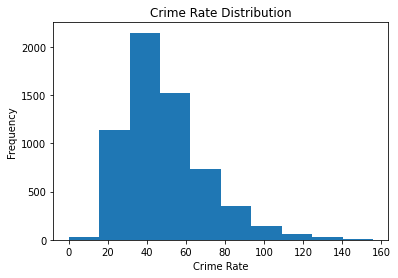

In [71]:
# explore distribution
import matplotlib.pyplot as plt
df = df_final
plt.hist(df['Crimes_per_1000'])
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.title('Crime Rate Distribution')
# also after narrowing the scope, there is still a large variation and
# skewed distribution in the outcome measure

In [72]:
sum(df['Crimes_per_1000'].isnull())

225

In [73]:
### rank crime rates from low to high and show the first 50
df['Crimes_per_1000'].sort_values().head(50)
# there are around 10 instances where there was no Crime reported

4081     0.0
4061     0.0
4062     0.0
4063     0.0
4064     0.0
4065     0.0
4077     0.0
4078     0.0
4079     0.0
4080     0.0
3450    12.0
7006    12.4
2232    12.8
1905    13.9
1248    14.3
6689    14.5
489     14.6
6690    14.7
7005    14.8
3902    14.8
1249    14.9
5771    14.9
3901    14.9
5769    15.0
5770    15.0
5641    15.1
1470    15.2
6785    15.2
1906    15.3
1250    15.5
5768    15.6
5767    15.7
1468    16.1
6420    16.3
5608    16.4
3444    16.4
488     16.6
6421    16.6
2233    16.7
3257    16.8
4459    16.8
928     16.8
3446    16.9
3449    16.9
5640    16.9
1469    16.9
6786    17.0
7117    17.1
3033    17.1
1030    17.2
Name: Crimes_per_1000, dtype: float64

In [74]:
# let's see if they belong to the same Region
df[df['Crimes_per_1000']==0][['Region', 'Year', 'Crimes_per_1000']]

,Region,Year,Crimes_per_1000
4061,Niet in te delen,2005,0.0
4062,Niet in te delen,2006,0.0
4063,Niet in te delen,2007,0.0
4064,Niet in te delen,2008,0.0
4065,Niet in te delen,2009,0.0
4077,Niet-gemeentelijk ingedeeld,2005,0.0
4078,Niet-gemeentelijk ingedeeld,2006,0.0
4079,Niet-gemeentelijk ingedeeld,2007,0.0
4080,Niet-gemeentelijk ingedeeld,2008,0.0
4081,Niet-gemeentelijk ingedeeld,2009,0.0


In [75]:
# they all belong to Regions that are not real municipalities, so these regions can be removed
df = df[~df['Region'].isin(list(['Niet in te delen', 'Niet-gemeentelijk ingedeeld']))]
df['Crimes_per_1000'].sort_values().head(50)

3450    12.0
7006    12.4
2232    12.8
1905    13.9
1248    14.3
6689    14.5
489     14.6
6690    14.7
3902    14.8
7005    14.8
5771    14.9
1249    14.9
3901    14.9
5770    15.0
5769    15.0
5641    15.1
1470    15.2
6785    15.2
1906    15.3
1250    15.5
5768    15.6
5767    15.7
1468    16.1
6420    16.3
5608    16.4
3444    16.4
488     16.6
6421    16.6
2233    16.7
3257    16.8
4459    16.8
928     16.8
3449    16.9
1469    16.9
5640    16.9
3446    16.9
6786    17.0
3033    17.1
7117    17.1
1030    17.2
3443    17.2
1247    17.3
3046    17.4
1251    17.4
5766    17.5
6687    17.6
3848    17.8
3445    17.8
2231    17.9
6688    18.0
Name: Crimes_per_1000, dtype: float64

In [76]:
# now the zeros are gone and we have less missings:
sum(df['Crimes_per_1000'].isnull())

203

In [77]:
# let's find out where the other missings are occurring
df[df['Crimes_per_1000'].isnull()][['Region', 'Year', 'Crimes_per_1000']].head(100)

,Region,Year,Crimes_per_1000
62,Aalburg,2019,NaN
63,Aalburg,2020,NaN
261,Ameland,2020,NaN
490,Bedum,2019,NaN
491,Bedum,2020,NaN
564,Bellingwedde,2018,NaN
565,Bellingwedde,2019,NaN
566,Bellingwedde,2020,NaN
572,Berg en Dal,2010,NaN
573,Berg en Dal,2011,NaN


In [ ]:
# suppose that we choose to remove any Regions with missings between 2004 - 2012
# and impute any missings from 2013 and later using last observation carried forward

In [78]:
# remove regions with missings up to 2012
df_tmp = df.copy() # copy the dataset
df_tmp = df_tmp[df_tmp['Year']<=2012] # select years up to 2012
df_tmp = df_tmp[df_tmp['Crimes_per_1000'].isnull()] #select rows with missing crime rates
to_delete = set(df_tmp['Region']) # select unique regions

df = df[~df['Region'].isin(list(to_delete))]
sum(df['Crimes_per_1000'].isnull())

125

In [79]:
# the missings that are still in the data (which must now all occur as of 2013 or later)
# will be imputed using last observation carried forward

# just to keep track of what we will be doing, let's bring up one specific region which has missings
df[df.Crimes_per_1000.isnull()][['Region', 'Year', 'Crimes_per_1000']]
df[df.Region=='Bedum'][['Region', 'Year', 'Crimes_per_1000']]

,Region,Year,Crimes_per_1000
476,Bedum,2005,36.3
477,Bedum,2006,34.7
478,Bedum,2007,35.7
479,Bedum,2008,38.9
480,Bedum,2009,35.7
481,Bedum,2010,31.4
482,Bedum,2011,35.1
483,Bedum,2012,28.7
484,Bedum,2013,22.0
485,Bedum,2014,25.1


In [80]:
# now let's apply last observarion carried forward, which will use the previously available number to impute
df['Crimes_per_1000'] = df['Crimes_per_1000'].fillna(method='ffill')
df[df.Region=='Bedum'][['Region', 'Year', 'Crimes_per_1000']]

,Region,Year,Crimes_per_1000
476,Bedum,2005,36.3
477,Bedum,2006,34.7
478,Bedum,2007,35.7
479,Bedum,2008,38.9
480,Bedum,2009,35.7
481,Bedum,2010,31.4
482,Bedum,2011,35.1
483,Bedum,2012,28.7
484,Bedum,2013,22.0
485,Bedum,2014,25.1


In [81]:
# now all the missings have been taken care off
sum(df['Crimes_per_1000'].isnull())

0

# FURTHER PREPARE THE OUTCOME VARIABLE AND ADD FEATURES

In [82]:
# the outcome variable is currently actually in the wrong row, as it should be 
# aligned with the feature information on the PREVIOUS year
df['Crimes_next_year'] = df['Crimes_per_1000'].shift(periods=-1)

In [83]:
#  we need to correct for the fact that this does not prevent Crime rates
# for one region being used in the next Region
# to see this, let's put the two Crimes-variables next to each other
# at any rate, make it a habit to visually inspect any adjustments you make
cols = df.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[3:-1]
df = df[cols]
df.head(34)

,Region,Year,Crimes_per_1000,Crimes_next_year,Distance_to_supermarket,15-25_yo,Non_western,Income_recipients,Households_one_person,Suriname,Income_per_inhabitant,Rental_homes_other,Energy_Semidetached_homes,Energy_Detached_homes,VrijstaandeWoning_gas,Energy_Apartment,Housing_corporation_homes,Distance_to_school,Unmarried,Households_with_kids,Widowed,Married,Passenger_cars_per_household,Birth_relative,Households_without_kids,0-15_yo,Women,Moroccan,Passenger_cars_total,Distance_to_daycare,Household_size,Population_density,25-45_yo,Housing_stock,Hoekwoning_gas,Western,Households_total,Inhabitants,Energy_Terraced_homes,Birth_total,Income_per_income_recipient,Divorced,Owner_occupied_homes,Households_below_poverty_level,Passenger_cars_per_area,Rental_homes,Death_total,Death_relative,Other_non_western,Energy_Corner_home,Schools_within_3k,TweeOnderEenKapWoning_gas,Netherlands_Antilles_Aruba,Address_density,Turkey,45-65_yo,Men,Ownership_unknown,Appartement_gas,Tussenwoning_gas
0,'s-Gravenhage,2005,115.3,108.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'s-Gravenhage,2006,108.3,117.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'s-Gravenhage,2007,117.4,117.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'s-Gravenhage,2008,117.1,115.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'s-Gravenhage,2009,115.7,118.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,'s-Gravenhage,2010,118.9,115.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,'s-Gravenhage,2011,115.2,106.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,'s-Gravenhage,2012,106.5,101.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,'s-Gravenhage,2013,101.6,97.0,0.5,12.0,34.0,335300.0,48.0,9.0,22.2,23.0,4650.0,5300.0,2500.0,2250.0,33.0,0.4,55.0,31.0,4.0,32.0,0.7,13.0,22.0,18.0,256115.0,6.0,179045.0,0.4,2.0,6179.0,32.0,244882.0,1650.0,16.0,250150.0,505855.0,3650.0,6590.0,32.4,10.0,42.0,16.0,2187.0,56.0,4025.0,7.0,9.0,3900.0,36.3,1850.0,2.0,4720.0,7.0,25.0,249735.0,2.0,1300.0,1450.0
9,'s-Gravenhage,2014,97.0,89.2,0.5,12.0,34.0,370200.0,47.0,9.0,23.0,22.0,4500.0,5200.0,1900.0,2200.0,32.0,0.4,55.0,31.0,4.0,32.0,0.7,13.0,22.0,18.0,257630.0,6.0,178360.0,0.4,2.0,6216.0,31.0,249994.0,1250.0,16.0,249285.0,508940.0,3550.0,6903.0,30.3,10.0,43.0,14.1,2179.0,55.0,4079.0,8.0,10.0,3800.0,36.0,1400.0,2.0,4755.0,7.0,25.0,251305.0,3.0,950.0,1100.0


In [84]:
import numpy as np
df['Year'] = df['Year'].astype(str).astype(int)
df.loc[df['Year']==2020, 'Crimes_next_year'] = np.nan
df.head(34)

,Region,Year,Crimes_per_1000,Crimes_next_year,Distance_to_supermarket,15-25_yo,Non_western,Income_recipients,Households_one_person,Suriname,Income_per_inhabitant,Rental_homes_other,Energy_Semidetached_homes,Energy_Detached_homes,VrijstaandeWoning_gas,Energy_Apartment,Housing_corporation_homes,Distance_to_school,Unmarried,Households_with_kids,Widowed,Married,Passenger_cars_per_household,Birth_relative,Households_without_kids,0-15_yo,Women,Moroccan,Passenger_cars_total,Distance_to_daycare,Household_size,Population_density,25-45_yo,Housing_stock,Hoekwoning_gas,Western,Households_total,Inhabitants,Energy_Terraced_homes,Birth_total,Income_per_income_recipient,Divorced,Owner_occupied_homes,Households_below_poverty_level,Passenger_cars_per_area,Rental_homes,Death_total,Death_relative,Other_non_western,Energy_Corner_home,Schools_within_3k,TweeOnderEenKapWoning_gas,Netherlands_Antilles_Aruba,Address_density,Turkey,45-65_yo,Men,Ownership_unknown,Appartement_gas,Tussenwoning_gas
0,'s-Gravenhage,2005,115.3,108.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'s-Gravenhage,2006,108.3,117.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'s-Gravenhage,2007,117.4,117.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'s-Gravenhage,2008,117.1,115.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'s-Gravenhage,2009,115.7,118.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,'s-Gravenhage,2010,118.9,115.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,'s-Gravenhage,2011,115.2,106.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,'s-Gravenhage,2012,106.5,101.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,'s-Gravenhage,2013,101.6,97.0,0.5,12.0,34.0,335300.0,48.0,9.0,22.2,23.0,4650.0,5300.0,2500.0,2250.0,33.0,0.4,55.0,31.0,4.0,32.0,0.7,13.0,22.0,18.0,256115.0,6.0,179045.0,0.4,2.0,6179.0,32.0,244882.0,1650.0,16.0,250150.0,505855.0,3650.0,6590.0,32.4,10.0,42.0,16.0,2187.0,56.0,4025.0,7.0,9.0,3900.0,36.3,1850.0,2.0,4720.0,7.0,25.0,249735.0,2.0,1300.0,1450.0
9,'s-Gravenhage,2014,97.0,89.2,0.5,12.0,34.0,370200.0,47.0,9.0,23.0,22.0,4500.0,5200.0,1900.0,2200.0,32.0,0.4,55.0,31.0,4.0,32.0,0.7,13.0,22.0,18.0,257630.0,6.0,178360.0,0.4,2.0,6216.0,31.0,249994.0,1250.0,16.0,249285.0,508940.0,3550.0,6903.0,30.3,10.0,43.0,14.1,2179.0,55.0,4079.0,8.0,10.0,3800.0,36.0,1400.0,2.0,4755.0,7.0,25.0,251305.0,3.0,950.0,1100.0


In [85]:
# let's change the name of the Crimes_per_1000 variable
df.rename(columns={'Crimes_per_1000': 'Crimes_current_year'}, inplace=True)

In [86]:
# while we are at it, let's introduce features containing the crime rates in 
# previous years
df['Crimes_previous_year'] = df['Crimes_current_year'].shift(periods=1)
df['Crimes_two_years_ago'] = df['Crimes_current_year'].shift(periods=2)
df[['Year', 'Crimes_current_year', 'Crimes_previous_year', 'Crimes_two_years_ago']].head(10)

,Year,Crimes_current_year,Crimes_previous_year,Crimes_two_years_ago
0,2005,115.3,NaN,NaN
1,2006,108.3,115.3,NaN
2,2007,117.4,108.3,115.3
3,2008,117.1,117.4,108.3
4,2009,115.7,117.1,117.4
5,2010,118.9,115.7,117.1
6,2011,115.2,118.9,115.7
7,2012,106.5,115.2,118.9
8,2013,101.6,106.5,115.2
9,2014,97.0,101.6,106.5


In [87]:
df.loc[df['Year']==2005, 'Crimes_previous_year'] = np.nan
df.loc[df['Year']==2005, 'Crimes_two_years_ago'] = np.nan
df.loc[df['Year']==2006, 'Crimes_two_years_ago'] = np.nan
df[['Year', 'Region', 'Crimes_current_year', 'Crimes_previous_year', 'Crimes_two_years_ago']].head(34)

,Year,Region,Crimes_current_year,Crimes_previous_year,Crimes_two_years_ago
0,2005,'s-Gravenhage,115.3,NaN,NaN
1,2006,'s-Gravenhage,108.3,115.3,NaN
2,2007,'s-Gravenhage,117.4,108.3,115.3
3,2008,'s-Gravenhage,117.1,117.4,108.3
4,2009,'s-Gravenhage,115.7,117.1,117.4
5,2010,'s-Gravenhage,118.9,115.7,117.1
6,2011,'s-Gravenhage,115.2,118.9,115.7
7,2012,'s-Gravenhage,106.5,115.2,118.9
8,2013,'s-Gravenhage,101.6,106.5,115.2
9,2014,'s-Gravenhage,97.0,101.6,106.5


In [88]:
# we could also express this as a change compared to the current year
df['Crimes_previous_year'] = df['Crimes_previous_year'] - df['Crimes_current_year']
df['Crimes_two_years_ago'] = df['Crimes_two_years_ago'] - df['Crimes_current_year']
df[['Year', 'Region', 'Crimes_current_year', 'Crimes_previous_year', 'Crimes_two_years_ago']].head(34)


,Year,Region,Crimes_current_year,Crimes_previous_year,Crimes_two_years_ago
0,2005,'s-Gravenhage,115.3,NaN,NaN
1,2006,'s-Gravenhage,108.3,7.0,NaN
2,2007,'s-Gravenhage,117.4,-9.1,-2.1
3,2008,'s-Gravenhage,117.1,0.3,-8.8
4,2009,'s-Gravenhage,115.7,1.4,1.7
5,2010,'s-Gravenhage,118.9,-3.2,-1.8
6,2011,'s-Gravenhage,115.2,3.7,0.5
7,2012,'s-Gravenhage,106.5,8.7,12.4
8,2013,'s-Gravenhage,101.6,4.9,13.6
9,2014,'s-Gravenhage,97.0,4.6,9.5


In [89]:
# in a final step, we also add columns containing the binary feature whether crime rates increased or decreased
# in the past two years as compared to the current year
df['change_one_year_ago'] = 'increased'
df['change_two_years_ago'] = 'increased'
df.loc[df['Crimes_previous_year'] > 0, 'change_one_year_ago'] = 'decreased'
df.loc[df['Crimes_two_years_ago'] > df['Crimes_previous_year'], 'change_two_years_ago'] = 'decreased'
df.loc[df['Year']==2005, 'change_one_year_ago'] = np.nan
df.loc[df['Year']==2005, 'change_two_years_ago'] = np.nan
df.loc[df['Year']==2006, 'change_two_years_ago'] = np.nan
df[['Crimes_current_year', 'Crimes_previous_year', 'Crimes_two_years_ago', 'change_one_year_ago', 'change_two_years_ago']].head(10)

,Crimes_current_year,Crimes_previous_year,Crimes_two_years_ago,change_one_year_ago,change_two_years_ago
0,115.3,NaN,NaN,NaN,NaN
1,108.3,7.0,NaN,decreased,NaN
2,117.4,-9.1,-2.1,increased,decreased
3,117.1,0.3,-8.8,decreased,increased
4,115.7,1.4,1.7,decreased,decreased
5,118.9,-3.2,-1.8,increased,decreased
6,115.2,3.7,0.5,decreased,increased
7,106.5,8.7,12.4,decreased,decreased
8,101.6,4.9,13.6,decreased,decreased
9,97.0,4.6,9.5,decreased,decreased


In [90]:
# Lastly, we generate a binary outcome variable that defines whether crime will increase or decrease
df['Crime_development'] = 'increased'
df.loc[df['Crimes_next_year'] <= df['Crimes_current_year'], 'Crime_development'] = 'not_increased'
df[['Crimes_current_year', 'Crimes_next_year', 'Crime_development']].head(50)

,Crimes_current_year,Crimes_next_year,Crime_development
0,115.3,108.3,not_increased
1,108.3,117.4,increased
2,117.4,117.1,not_increased
3,117.1,115.7,not_increased
4,115.7,118.9,increased
5,118.9,115.2,not_increased
6,115.2,106.5,not_increased
7,106.5,101.6,not_increased
8,101.6,97.0,not_increased
9,97.0,89.2,not_increased


In [91]:
# Let's throw out the first two years, as they do not contain
# information on crime in the previous two years, and the last
# year for not having a crime next year
df = df.loc[df['Year']>2006]
df = df.loc[df['Year']<2020]
df.shape

(4953, 65)

# DATA SPLITTING AND HANDLING MISSING DATA

In [92]:
# Now that the data are in the right shape, we split the data into
# a training and test set
df_train = df.loc[df['Year'] <= 2015]
df_test = df.loc[df['Year'] >= 2016]
print('fraction of data in the train set', round(len(df_train)/len(df),2))
print('fraction of data in the test set', round(len(df_test)/len(df),2))

fraction of data in the train set 0.69
fraction of data in the test set 0.31


In [93]:
# we need to impute missing data in order to run our models
# we will go with a straightforward imputation using median values
# to quickly get our data to where we can model it
# Please note that we can always go back to apply a more 
# sophisticated way of imputation
df_train.fillna(df_train.median(), inplace=True)
df_train.isnull().sum().describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


count    65.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

And that brings us to the end of the data preparation phase. Please note how much effort it actually takes to get the data in the right shape, how many choices were made along the way, how much domain expertise had to be involved in making these choices, but also how easy it is to lose track of all the steps taken:
- tables containing different columns
- similar columns having different names
- region names being cut off for older years
- region names differently formatted for the feature and outcome tables
- crime rates being partly missing
- feature data being partly missing 
- crime rates containing zeros
- ...

It is important and not straightforward at all to build a flexible pipeline, that can be easily adjusted afterwards, and that allows you to keep track of (the implications of) the changes being made to the data.

Now that we have our data, let's proceed with making some first models in our next notebook.